<a href="https://colab.research.google.com/github/Pratik94229/Capstone-3/blob/main/Credit_Card_Default_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**            Pratik Thorat


# **GitHub Link -**

https://github.com/Pratik94229/Capstone-3

# **Problem Statement**


**Write Problem Statement Here.**

In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders.The project is aimed at predicting default of customers in Taiwan.

# **Project Summary -**

**Steps Performed for  ML Model Implementation:**

> Step 1: Loading and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modeling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model using pickel library.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. Box Plot
3. Grouped bar plot
4. Heatmap


**ML Models used for training & testing:**
1. Logistic Regression.
2. KNN.
3. Random Forest.
4. Support Vector
5. XGBClassifier
6. CatBoostClassifier
7. LGBMClassifier

**Insights from EDA impacting business:**


**1) Insights about Demographic Distribution:-**
 * 22.12% of the customers are going to default.
 *Female customers are more than male customers.
 * The number of female defaulters is more than male defaulters.
 * There is not much difference in default percentage based on gender.

**2) Insights about Credit Limit:-**
 * Most customers have a credit limit between the range of 5000-50000 (NT dollars)while a very less number of customers have a credit limit above 500000(NT dollars).
 * As the credit limit increases the number of defaulters as well as the defaulters' percentage decreases.
 * Most high school graduates and university graduates have a credit limit in the 5000-50000 (NT dollar) range.
 * While more school graduates have a credit limit in the range of 200000-300000(NT dollars).
 * Females have more credit limits in all categories as compared to males.


  **3) Insights about Education Qualification:-**
 * The maximum number of customers are university graduates across the gender while the least is from the others category.

 * The absolute numbers and percentage-wise defaults are maximum among university graduates.
 * Higher default percentage is observed in high school graduate males. 

**4)Insights about Marital status:-**
 * More customers are single than married.
 * The absolute value and percentage of defaults are more among single customers. 

* The maximum default percentage is observed in customers who are married and high school graduates.

**5) Insights about Age Distribution**
 * The maximum number of customers have age between 25-35 years while very few are above 60 years of age.
 * The maximum number of defaulting customers are between the age of 25 to 30.
Maximum default percentage is observed in the age group of 20-25 yrs and 60-80 years of age category.




**Suggestions for reducing defaults and improving profitability:**
* First of all create a risk profile of the customer based on criteria like the source of income, spending behavior, credit limit, age, sex, marriage, education, etc
* Segregate customers based on their risk profile into
  * Low-risk customer. 
  * Medium-risk customer.
  * High-risk customer.

* Monitor customer transactions continuously and reward them for timely bill payments and penalize them for delayed payments and keep updating their risk profile according to their behavior.
* Taking prompt corrective action by giving a reminder to customers in case bill payment is due more than 10 days after the completion of the credit cycle.
* Blocking the customers' credit card transactions in case payment is due more than 30 days after the credit cycle period.

* Negotiating with the customer and convincing him to pay in case the customer is unable to pay the bill on time by giving some relaxation like reduced interest rate, more time for repayment, etc. 

* Issuing new credit cards to customers only if the customer duly fulfills all the criteria regarding loan disbursal and has a good CIBIL score.


**ML Model selected for deployment: XGBClassifier**
> XGBoost is a powerful and widely-used tool for classification tasks, and it has been applied successfully to a variety of real-world problems such as predictive modeling, time series forecasting, customer churn prediction, etc.

**Advantages**
* XGB consists of many hyper-parameters that can be tuned — a primary advantage over gradient boosting machines.
* XGBoost has an in-built capability to handle missing values.
* It provides various intuitive features, such as parallelization, distributed computing, cache optimization, and more. 

**Disadvantages:**

* Like any other boosting method, XGB is sensitive to outliers.
*, Unlike LightGBM, in XGB, one has to manually create dummy variable/ label encoding for categorical features before feeding them into the models.

# ***Let's Begin !***

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install crucio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Import Libraries

#For data handling and preprocessing
import pandas as pd
import numpy as np

#For visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline 


#For scaling dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 

#Model Evaluations
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score

#For hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#For metric score calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_curve, roc_auc_score
from scikitplot.metrics import plot_roc_curve

#For model Explainability
import eli5 as eli

# Model saving
import pickle

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir="/content/drive/MyDrive/Colab Notebooks/Module 3/Capstone project 3/default of credit card clients.xls"

In [ ]:
# Load Dataset
dataset=pd.read_excel(working_dir,skiprows = 1)

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(30000, 25)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no duplicate values in the dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset[dataset.isna()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no missing values in the dataset.

<Axes: >

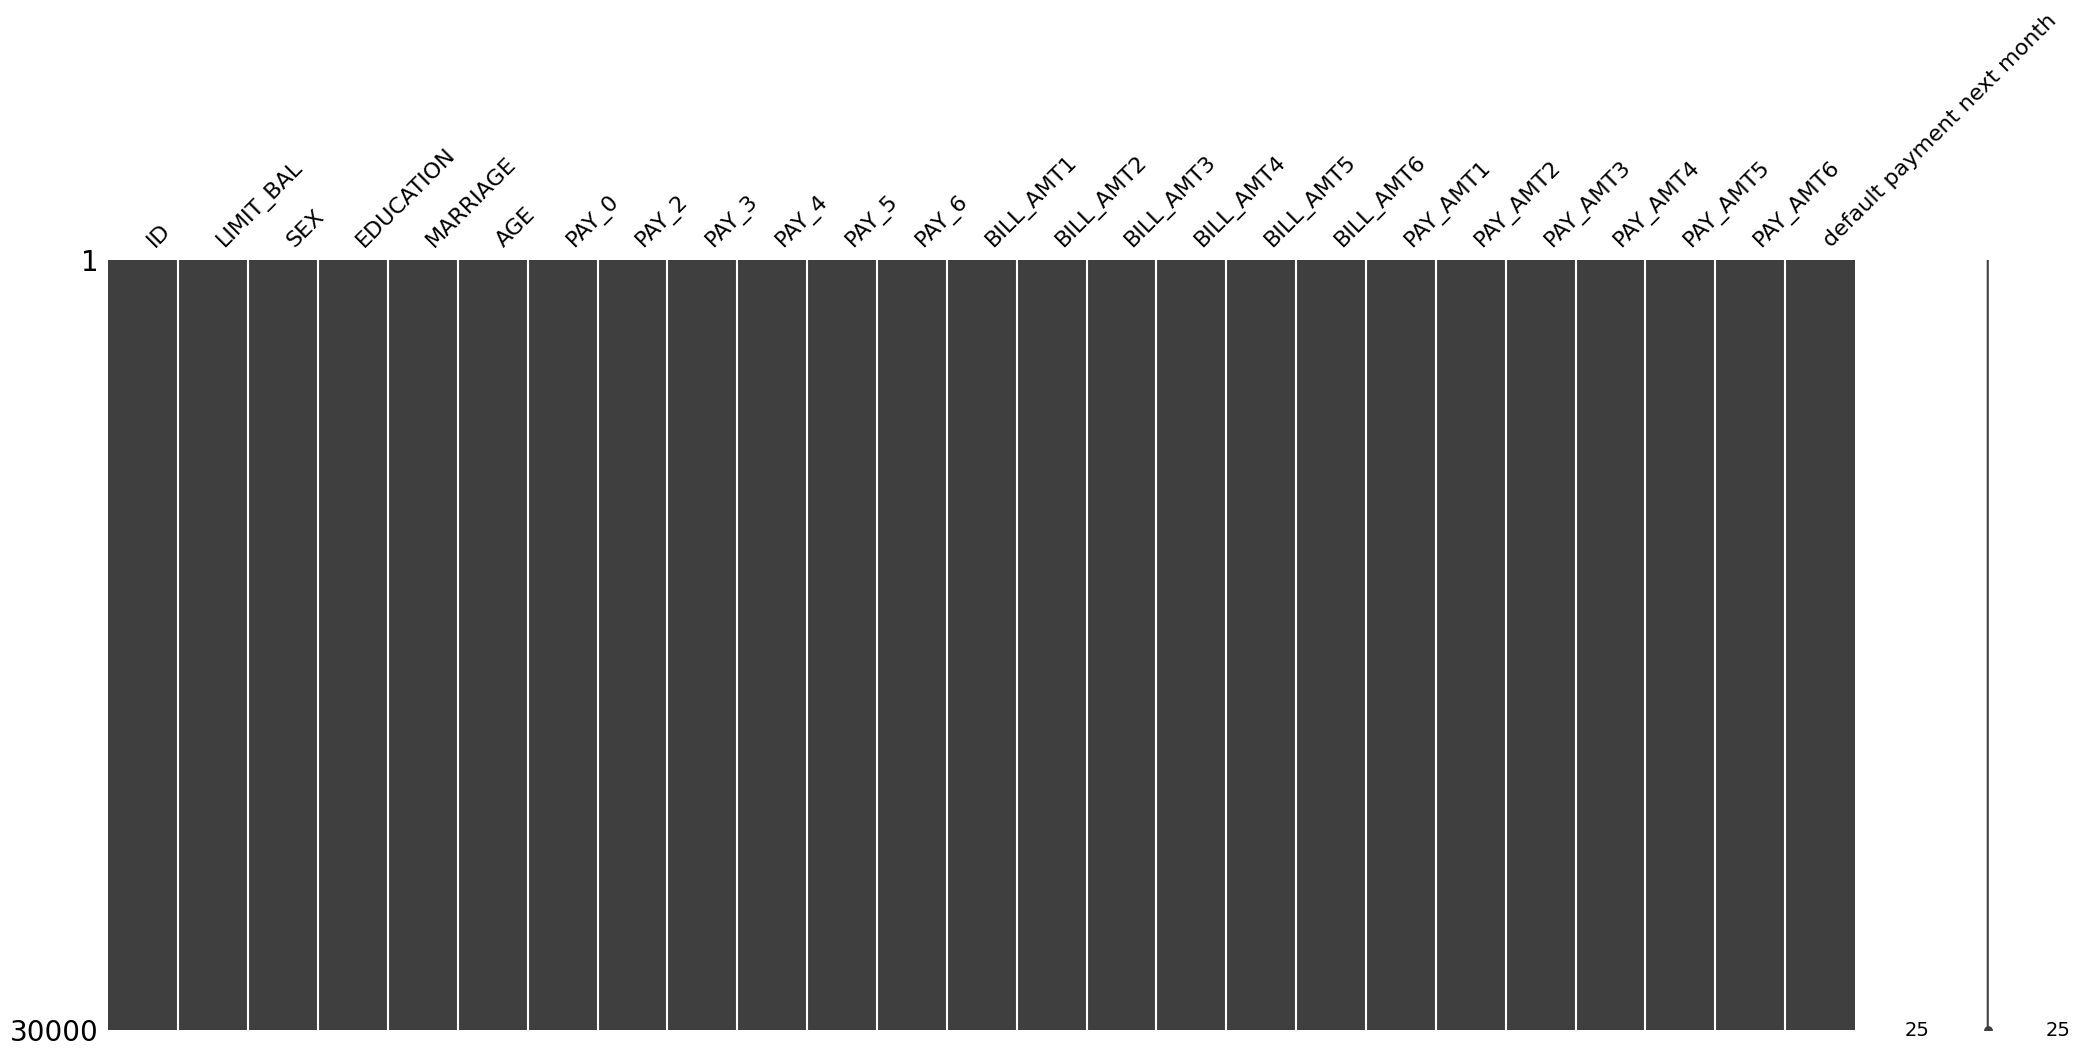

In [ ]:
# Visualizing the missing values
msno.matrix(dataset)

### What did you know about your dataset?

1. Dataset contains 30000 rows & 25 columns.

2. All 25 columns have numerical values as variables.

3. Columns SEX, EDUCATION, and MARRIAGE contains categorical variable which are:-

* **SEX**: Gender (1 = male; 2 = female).

* **EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)

* **MARRIAGE**: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

4. Dataset has no Null/Duplicate values.

5. **Default payment next month** column is the dependent variable while the rest are the independent variable.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 features in the dataset:

* **ID**: ID of each client

* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* **SEX**: Gender (1=male, 2=female)

* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)

* **AGE**: Age in years

* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 8=payment delay for eight months, 9=payment delay for nine months and above)

* **PAY_2**: Repayment status in August, 2005 (scale same as above)

* **PAY_3**: Repayment status in July, 2005 (scale same as above)

* **PAY_4**: Repayment status in June, 2005 (scale same as above)

* **PAY_5**: Repayment status in May, 2005 (scale same as above)

* **PAY_6**: Repayment status in April, 2005 (scale same as above)

* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)

* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)

* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)

* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)

* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)

* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)

* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)

* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)

* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)

* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)

* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)

* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

* **default payment next month**: Default payment (1=yes, 0=no)




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n------------------------------------------")
  if i in dataset.columns:
    if(dataset[i].nunique() < 12):
      print(f"\n{dataset[i].unique()}\n------------------------------------------")

Unique ID's count:30000
------------------------------------------
Unique LIMIT_BAL's count:81
------------------------------------------
Unique SEX's count:2
------------------------------------------

[2 1]
------------------------------------------
Unique EDUCATION's count:7
------------------------------------------

[2 1 3 5 4 6 0]
------------------------------------------
Unique MARRIAGE's count:4
------------------------------------------

[1 2 3 0]
------------------------------------------
Unique AGE's count:56
------------------------------------------
Unique PAY_0's count:11
------------------------------------------

[ 2 -1  0 -2  1  3  4  8  7  5  6]
------------------------------------------
Unique PAY_2's count:11
------------------------------------------

[ 2  0 -1 -2  3  5  7  4  1  6  8]
------------------------------------------
Unique PAY_3's count:11
------------------------------------------

[-1  0  2 -2  3  4  6  7  1  5  8]
-----------------------------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#converting all 0,4,5,6 value on education to 4
dataset['EDUCATION']=dataset['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

#Converting 0 in marriage to 3
dataset['MARRIAGE']=dataset['MARRIAGE'].map({0:3,1:1,2:2,3:3})

In [ ]:
#Function to divide limit column into categorical variable for visualization
def limit_cat(x):
  if x >240000:
    return 'Above 240000'
  elif x >140000 :
    return 'Between 140000-240000'
  elif x >10000:
    return 'Between 10000-140000'
  else:
    return    

In [ ]:
#Function for dividing age column into categorical variable for visualization
def age_cat(x):
  if x >45:
    return 'Above 45'
  elif x > 35:
    return '35-45'
  else:
    return '21-35'   

In [ ]:
#creating new categorical variable.
dataset['Limit_cat'] = dataset['LIMIT_BAL'].apply(lambda x:limit_cat(x))

In [ ]:
#creating new categorical variable.
dataset['Age_cat'] = dataset['AGE'].apply(lambda x: age_cat(x))

### What all manipulations have you done and insights you found?

Created new limit_cat column by dividing it into 
* 10000 to 140000. 
* 140000 to 240000. 
* Above 240000.

Created new Age_cat column by dividing it into 
* 21 to 35 years. 
* 35 to 45 years. 
* Above 45 years of age.

### Checking & Handling outliers in dataset.

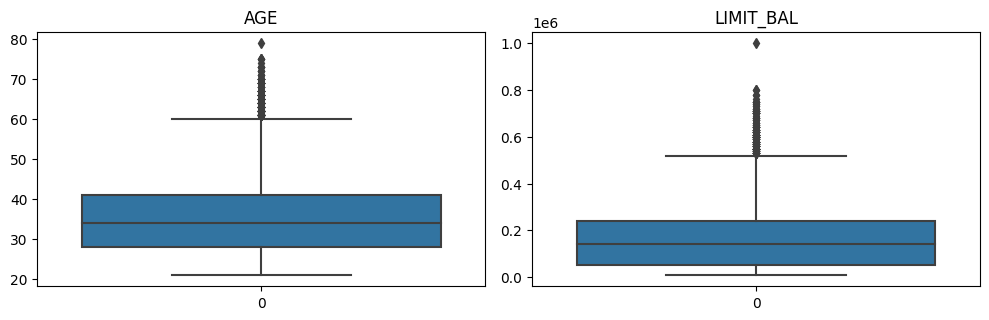

In [ ]:
# checking Outliers with seaborn boxplot

plt.figure(figsize=(10,6))
n=0
for i in ['AGE','LIMIT_BAL']:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(dataset[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

* Ignoring statistical outliers as these values are very well accepted values of age and balance limit. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

#Calculating percentage of defaulters and non defaulters 
classes=dataset['default payment next month'].value_counts()
not_default=classes[0]/dataset['default payment next month'].count()*100
defaulter=classes[1]/dataset['default payment next month'].count()*100

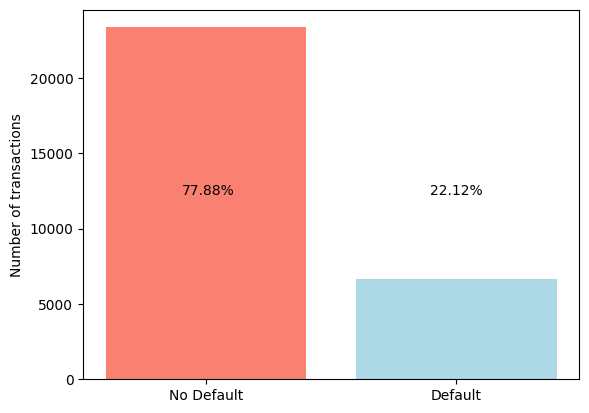

In [ ]:
#Barplot of percentage of defaulters vs non defaulters.
plt.bar(['No Default','Default'], classes, color=['salmon','lightblue'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(not_default),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(defaulter),(0.7, 0.5), xycoords='axes fraction')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing rented bike sharing demand with different seasons  so bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

* 22.12% of the customers are going to default

#### Chart - 2

#Customer default analysis as per Gender.

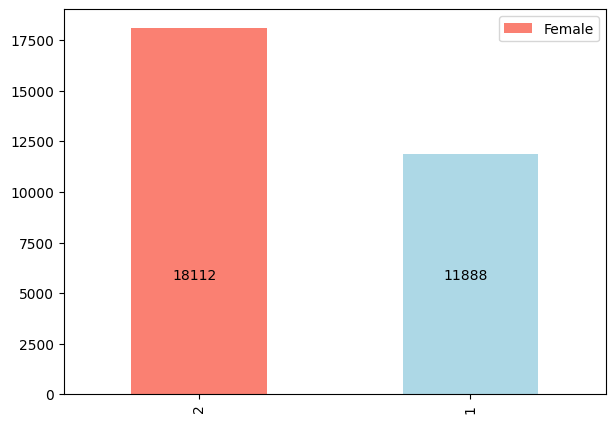

In [ ]:
#Barplot of number of Male vs Female customers
dataset['SEX'].value_counts().plot(kind="bar",figsize=(7,5),color=['salmon','lightblue'])

#Calculating annotated vales
sex_df=dataset['SEX'].value_counts().reset_index()
female=sex_df['SEX'][0]
male=sex_df['SEX'][1]
plt.annotate("{}".format(female),(0.2, 0.3), xycoords='axes fraction')
plt.annotate("{}".format(male),(0.7, 0.3), xycoords='axes fraction')
plt.legend(['Female','Male'])
plt.show()

#####  What is/are the insight(s) found from the chart?

There are more number of female customers than male customers.

#### Chart - 3

In [ ]:
#Function to plot bargraph of defaulter percentage with respect to column with which it is called.
def plot_bar(col):
 dataset[col].value_counts()
 df=dataset.groupby(col)['default payment next month'].sum().reset_index()
 df.rename(columns = {'default payment next month':'Default Percentage'}, inplace = True)

 #condition if sex column is provided calculation is done differently
 if(col=='SEX'):
   df['Default Percentage'][0]=round(df['Default Percentage'][0]/(df['Default Percentage'][0]+dataset.SEX.value_counts()[1]),4)*100
   df['Default Percentage'][1]=round(df['Default Percentage'][1]/(df['Default Percentage'][0]+dataset.SEX.value_counts()[2]),4)*100 
 else:
   for i in range(dataset[col].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+dataset[col].value_counts().reset_index()[col][i]),4)*100
#for plotting bar graph
 fig = plt.subplots(figsize=(8,5))
 sns.barplot(x =col,y ='Default Percentage',data = df).set_title('Default Percentage distribution by ' +col)
 for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{}%".format(df['Default Percentage'][i]),(0.2+i*0.5, 0.3), xycoords='axes fraction')

 #plt.legend(df[x])
 plt.show()

In [ ]:
#Function to plot grouped bargraph of defaulter vs non defaulter based on column with which it is called.
def default_col(a):
  pd.crosstab(dataset[a],dataset['default payment next month']).plot(kind="bar",figsize=(5,5),color=['salmon','lightblue'])
  plt.legend(['No default','Default'])
  



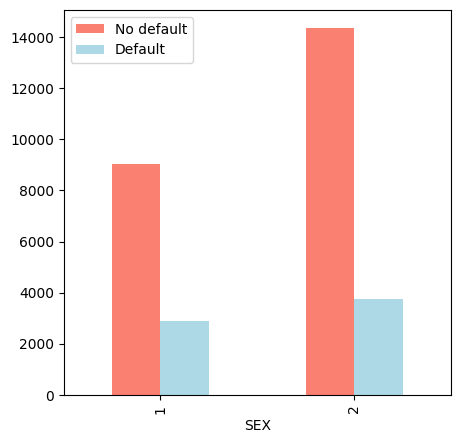

In [ ]:
# Grouped Barplot of Sex vs Default.
default_col('SEX')



##### What is/are the insight(s) found from the chart?


* Female customers are more than male customers.
* Absolute value of female defaulter is more than male defaulter.

#### Chart - 4

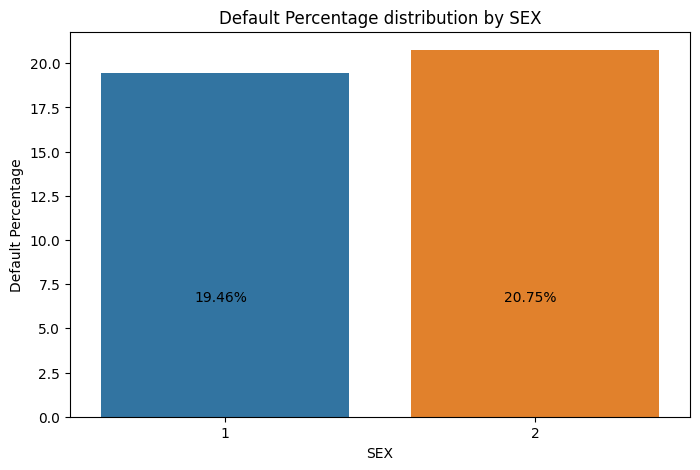

In [ ]:
#Percentage of default w.r.t male and feamale.
plot_bar('SEX')

<b>                                1=Male,   2=Female

##### What is/are the insight(s) found from the chart?

There is not much difference in default percentage based on gender.

#Customer default analysis as per credit limit.

#### Chart - 5

In [ ]:
#creating new column limitbin by dividing limit columns into bins 
dataset['LimitBin'] = pd.cut(dataset['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(dataset['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


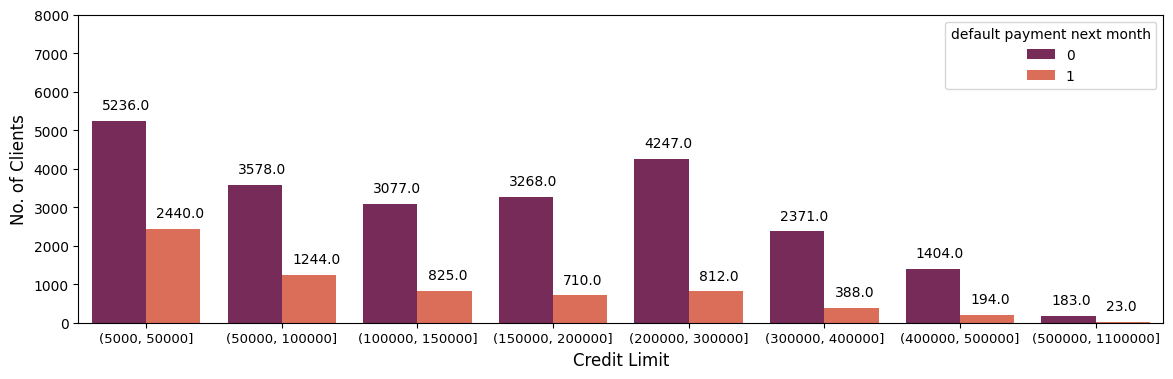

In [ ]:
#Grouped bargraph showing customers vs defaulting by limit bins
plt.figure(figsize=(14,4))

dataset['LimitBin'] = dataset['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = dataset, x = 'LimitBin', hue="default payment next month", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Credit Limit", fontsize= 12)
plt.ylabel("No. of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

##### 2. What is/are the insight(s) found from the chart?

* The maximum number of customers has a credit limit between the range of 5000-50000 while a very less number of customers have a credit limit above 500000.

* The maximum number of defaulting customers have a credit limit in 5000-50000 range.

* As the credit limit increases the number of defaulters decreases.

#### Chart - 6

In [ ]:
#finding default percentage of each limit
dataset['default payment next month'].groupby(dataset['LimitBin']).value_counts(normalize = True)

LimitBin           default payment next month
(100000, 150000]   0                             0.788570
                   1                             0.211430
(150000, 200000]   0                             0.821518
                   1                             0.178482
(200000, 300000]   0                             0.839494
                   1                             0.160506
(300000, 400000]   0                             0.859369
                   1                             0.140631
(400000, 500000]   0                             0.878598
                   1                             0.121402
(5000, 50000]      0                             0.682126
                   1                             0.317874
(50000, 100000]    0                             0.742016
                   1                             0.257984
(500000, 1100000]  0                             0.888350
                   1                             0.111650
Name: default payment next

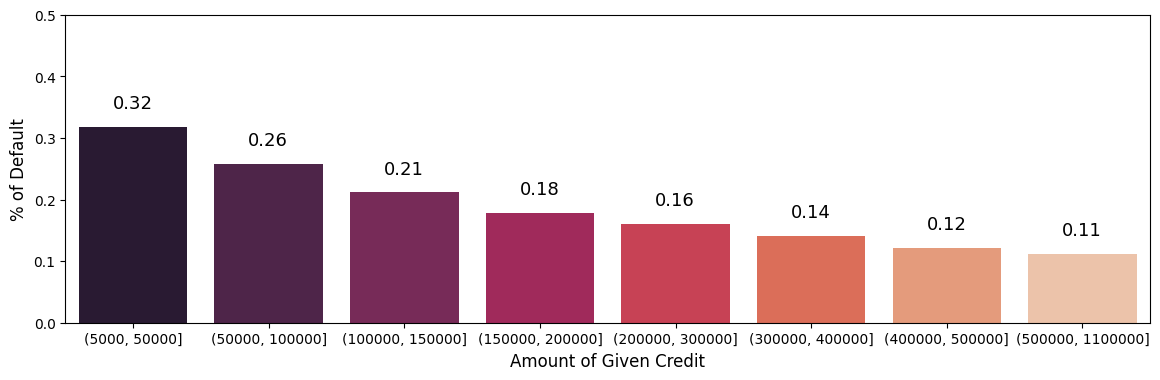

In [ ]:
#Ploting bar graph of default percentage of each bins.
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "default payment next month", data = dataset, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

#####  What is/are the insight(s) found from the chart?

* The maximum number of defaulting customers have a limit balance of the 5000-50000 range.
* As the credit limit increases the default percentage decreases.

#### Chart - 8

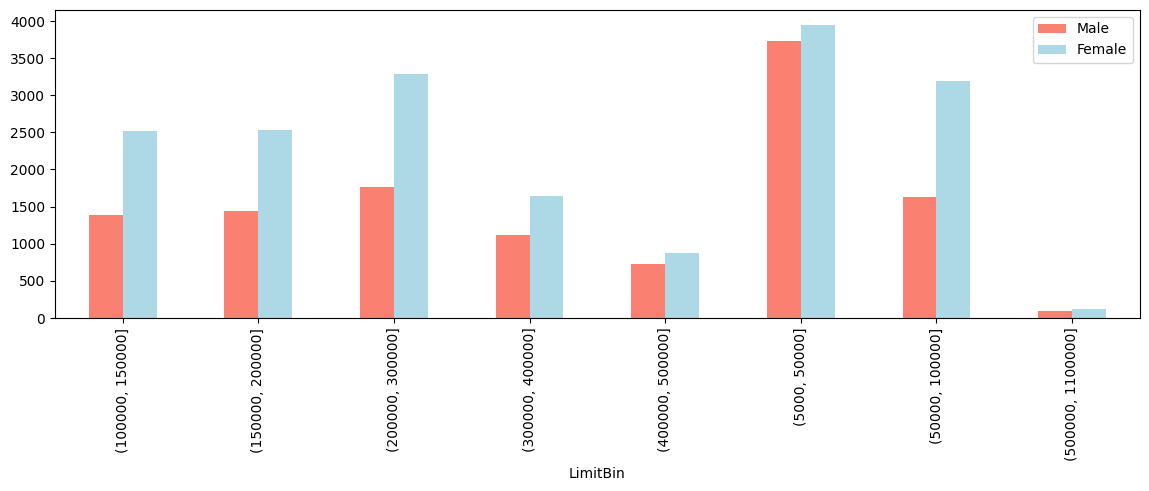

In [ ]:
#Grouped barchart of number of male and female as per limit category. 
dataset.groupby('LimitBin')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(14,4),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

#####  What is/are the insight(s) found from the chart?

* Females have more credit limits in all categories as compared to males.

#Customer default analysis as per Educational qualification.

#### Chart - 9

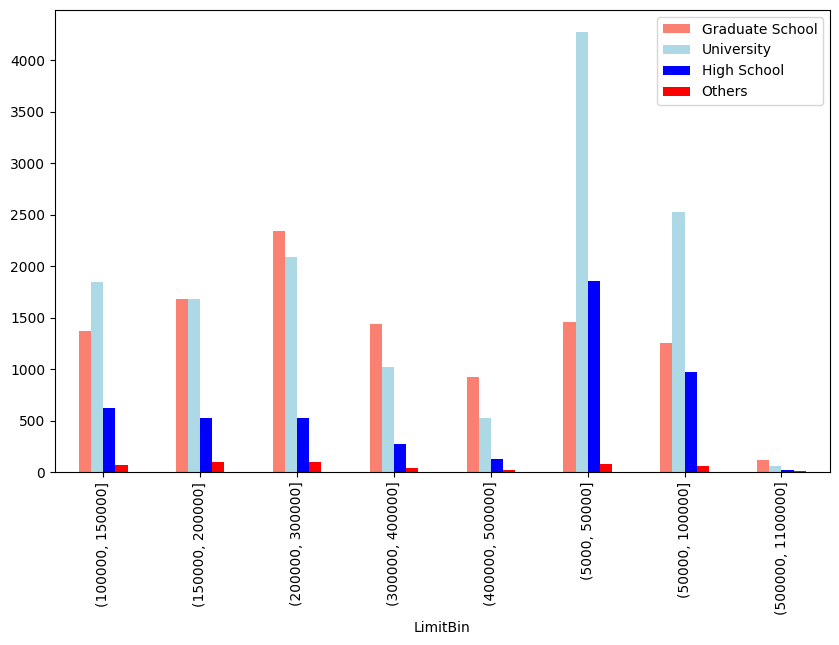

In [ ]:
#Grouped bar chart showing number of customers as per education qualification.
dataset.groupby('LimitBin')['EDUCATION'].value_counts().unstack().plot(kind="bar",figsize=(10,6),color=['salmon','lightblue','blue','red'])
plt.legend(['Graduate School','University','High School','Others'])
plt.show()                                                                        

<b>Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

##### 1. What is/are the insight(s) found from the chart?

* High school graduates,University graduate are maximum in 5000-50000 credit limit range.
* While school graduates are more in credit limit category of 200000-300000.

#### Chart - 10

<Axes: ylabel='Frequency'>

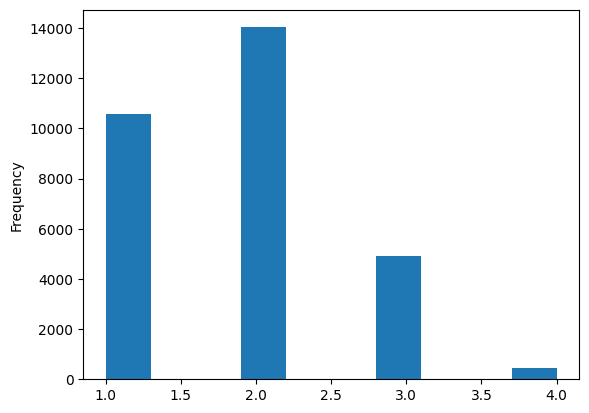

In [ ]:
#Bargraph showing number of customer as per education.  
dataset.EDUCATION.plot.hist()

<b>Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

##### 1. What is/are the insight(s) found from the chart?

* Maximum number of customers are university graduate while least are from others category.

#### Chart - 11

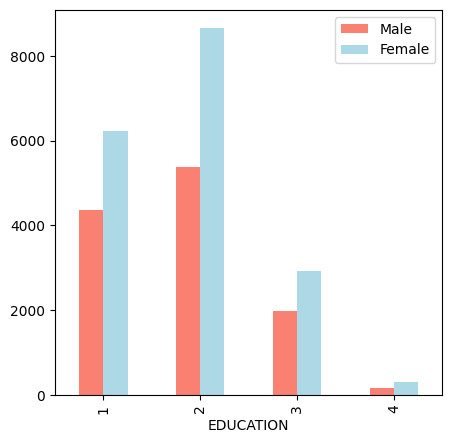

In [ ]:
#Gender wise distribution of number of customer by education.
dataset.groupby('EDUCATION')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(5,5),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

<b>Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

#####  What is/are the insight(s) found from the chart?

* Maximum number of female customers are university graduate.

#### Chart - 12

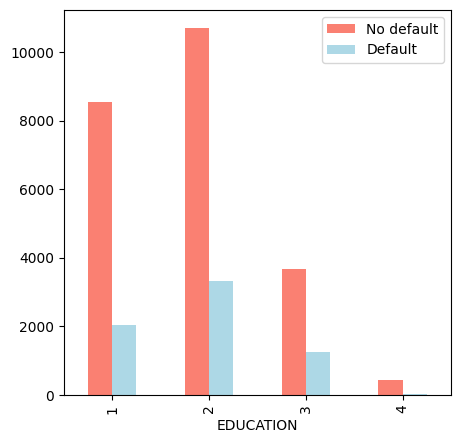

In [ ]:
#Grouped Barplot showing number of customer defaulted as per education qualification
default_col('EDUCATION')

<b>1=Graduate school , 2=University , 3=High School , 0,4,5,6=others

#####  What is/are the insight(s) found from the chart?

* Absolute numbers of defaulters is maximum among university graduates. 

#### Chart - 13

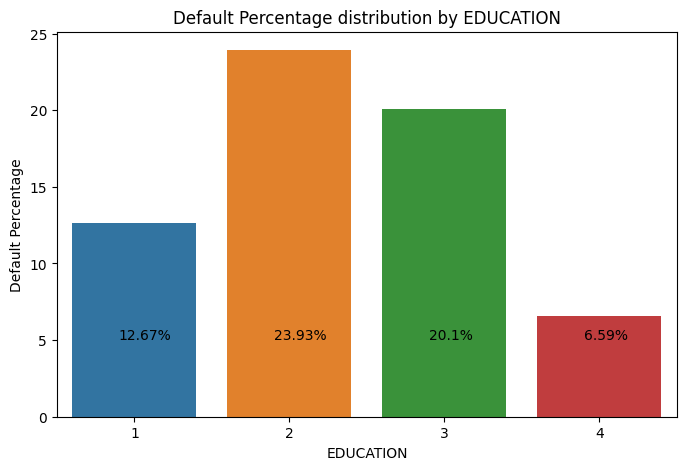

In [ ]:
#Bar graph showing default percentage as per education.

dataset["EDUCATION"].value_counts()
df=dataset.groupby("EDUCATION")['default payment next month'].sum().reset_index()
df.rename(columns = {'default payment next month':'Default Percentage'}, inplace = True)
for i in range(dataset["EDUCATION"].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+dataset["EDUCATION"].value_counts().reset_index()["EDUCATION"][i]),4)*100
#for plotting bar graph
fig = plt.subplots(figsize=(8,5))
sns.barplot(x ='EDUCATION',y ='Default Percentage',data = df).set_title('Default Percentage distribution by EDUCATION')
for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{}%".format(df['Default Percentage'][i]),(0.1+i*0.25, 0.2), xycoords='axes fraction')

#plt.legend(df[x])
plt.show()

<b>1=Graduate school , 2=University , 3=High School , 0,4,5,6=others

#####  What is/are the insight(s) found from the chart?

* Maximum percentage of defaulters are university graduates while least among the others category.

#### Chart - 14

#Customer default analysis as per their maritial status.

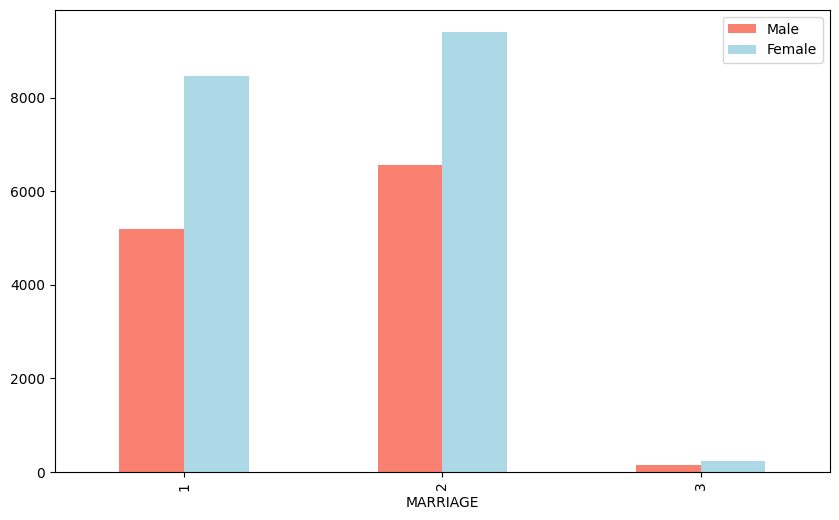

In [ ]:
#Bargraph showing number of customers as per their maritial status
dataset.groupby('MARRIAGE')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

<b> Marital status (1 = married; 2 = single; 3 = divorce+others).

#####  What is/are the insight(s) found from the chart?

More number of customers are single than being married.

#### Chart - 15

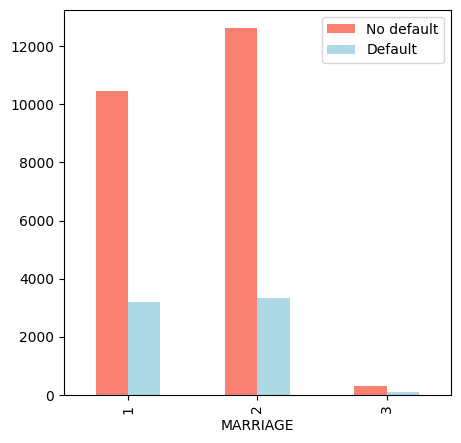

In [ ]:
# Grouped Bargraph showing customer default as per maritial status.
default_col('MARRIAGE')

<b> Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

##### 1. What is/are the insight(s) found from the chart?

Absolute value of defaulters are more among customers who are single. 

#### Chart - 16

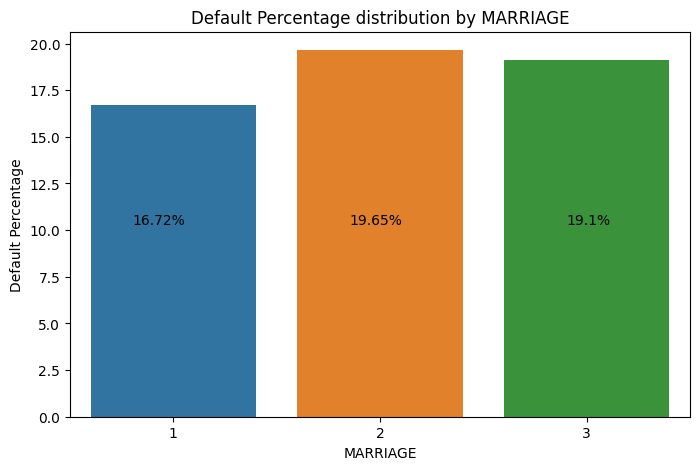

In [ ]:
#Bargraph showing default percentage as per their mariatial status.
dataset['MARRIAGE'].value_counts()
df=dataset.groupby('MARRIAGE')['default payment next month'].sum().reset_index()
df.rename(columns = {'default payment next month':'Default Percentage'}, inplace = True)
for i in range(dataset['MARRIAGE'].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+dataset['MARRIAGE'].value_counts().reset_index()['MARRIAGE'][i]),4)*100
#for plotting bar graph
fig = plt.subplots(figsize=(8,5))
sns.barplot(x ='MARRIAGE',y ='Default Percentage',data = df).set_title('Default Percentage distribution by MARRIAGE')
for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{0:.4}%".format(df['Default Percentage'][i]),(0.1+i*0.35, 0.5), xycoords='axes fraction')

#plt.legend(df[x])
plt.show()

<b> Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

#####  What is/are the insight(s) found from the chart?

Maimum percentage of defaulting customers are single

#### Chart - 17

#Customer default analysis as per age.

In [ ]:
#creating new column agebins by dividing age column in bins
dataset['AgeBin'] = pd.cut(dataset['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(dataset['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [ ]:
#Calculating default percentage of age bins
dataset['default payment next month'].groupby(dataset['AgeBin']).value_counts(normalize = True)

AgeBin    default payment next month
(20, 25]  0                             0.733402
          1                             0.266598
(25, 30]  0                             0.798516
          1                             0.201484
(30, 35]  0                             0.805728
          1                             0.194272
(35, 40]  0                             0.783811
          1                             0.216189
(40, 50]  0                             0.767027
          1                             0.232973
(50, 60]  0                             0.747621
          1                             0.252379
(60, 80]  0                             0.731618
          1                             0.268382
Name: default payment next month, dtype: float64

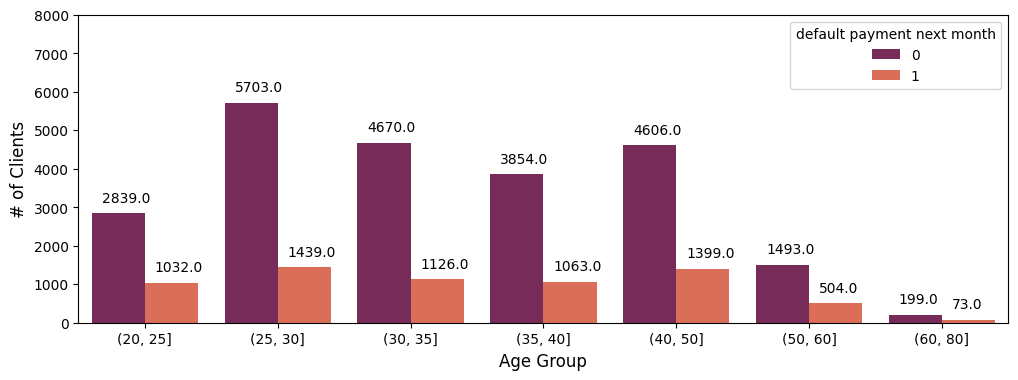

In [ ]:
#Bargraph showing Age vs no. of defaults in agebins
plt.figure(figsize=(12,4))

dataset['AgeBin'] = dataset['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = dataset, x = 'AgeBin', hue="default payment next month", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Maximum customers age in between 25-35 years while very few are above 60 years of age

* Maximum number of defaulting customers are between age of 25 to 30.

#### Chart - 18

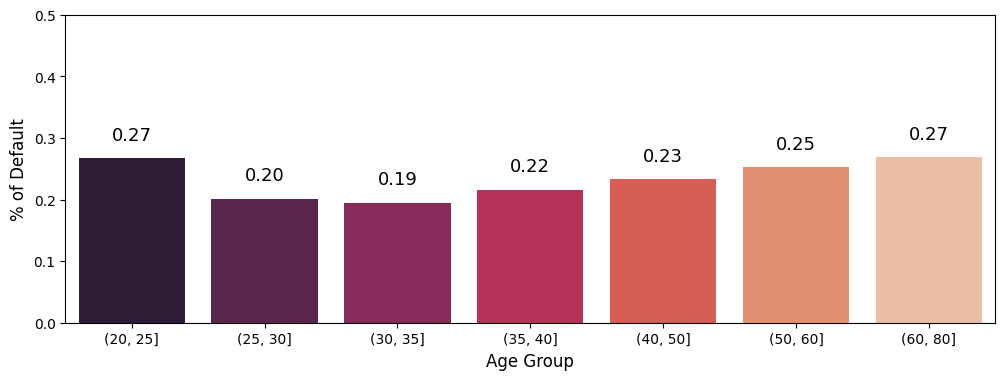

In [ ]:
#Bargraph showing percentage of default as per age category.
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "default payment next month", data = dataset, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

##### 1. What is/are the insight(s) found from the chart?

Maximum default percentage is observed in the age group of 20-25 yrs and 60-80 years of age category.

#Chart 19

In [ ]:
#Calculating default percentage of education and sex column
dataset.groupby(by=['EDUCATION', 'SEX'])['default payment next month'].value_counts(normalize = True)

EDUCATION  SEX  default payment next month
1          1    0                             0.791915
                1                             0.208085
           2    0                             0.818649
                1                             0.181351
2          1    0                             0.737998
                1                             0.262002
           2    0                             0.777957
                1                             0.222043
3          1    0                             0.726131
                1                             0.273869
           2    0                             0.763580
                1                             0.236420
4          1    0                             0.917647
                1                             0.082353
           2    0                             0.936242
                1                             0.063758
Name: default payment next month, dtype: float64

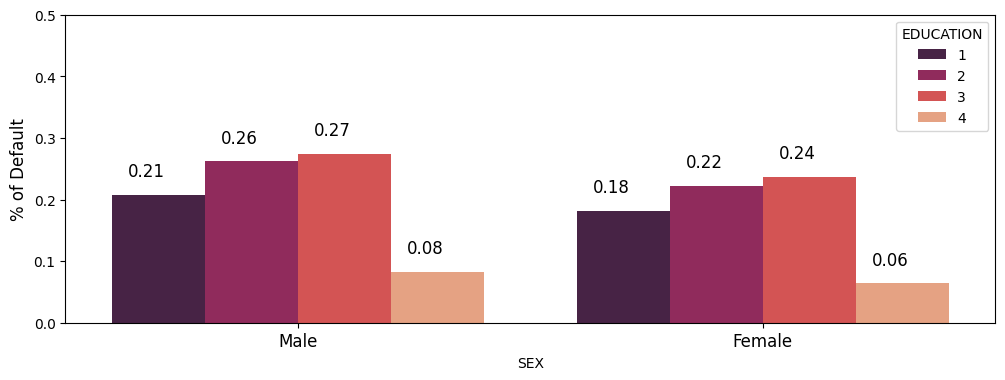

In [ ]:
#Bar graph showing default percentage based on education and sex value.
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default payment next month", hue = "EDUCATION", data = dataset, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

Higher default percentage is observed in high school graduated males. 

#Chart 20

In [ ]:
#calculating default percentage based on education and marriage
dataset.groupby(by=['EDUCATION', 'MARRIAGE'])['default payment next month'].value_counts(normalize = True)

EDUCATION  MARRIAGE  default payment next month
1          1         0                             0.793391
                     1                             0.206609
           2         0                             0.815832
                     1                             0.184168
           3         0                             0.759259
                     1                             0.240741
2          1         0                             0.756504
                     1                             0.243496
           2         0                             0.769373
                     1                             0.230627
           3         0                             0.732143
                     1                             0.267857
3          1         0                             0.736456
                     1                             0.263544
           2         0                             0.763227
                     1                             0

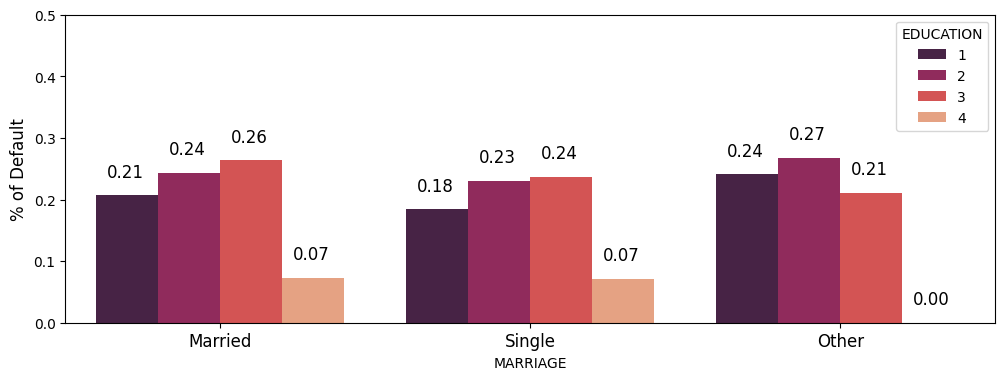

In [ ]:
#Bar graph showing default percentage based on marriage and education qualification
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default payment next month", hue = "EDUCATION", data = dataset, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single','Other'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

<b>Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)

##### 1. What is/are the insight(s) found from the chart?

Maximum default percentage is observed in customers who are married and high school graduate.

#### Chart - 21 - Correlation Heatmap

<Axes: >

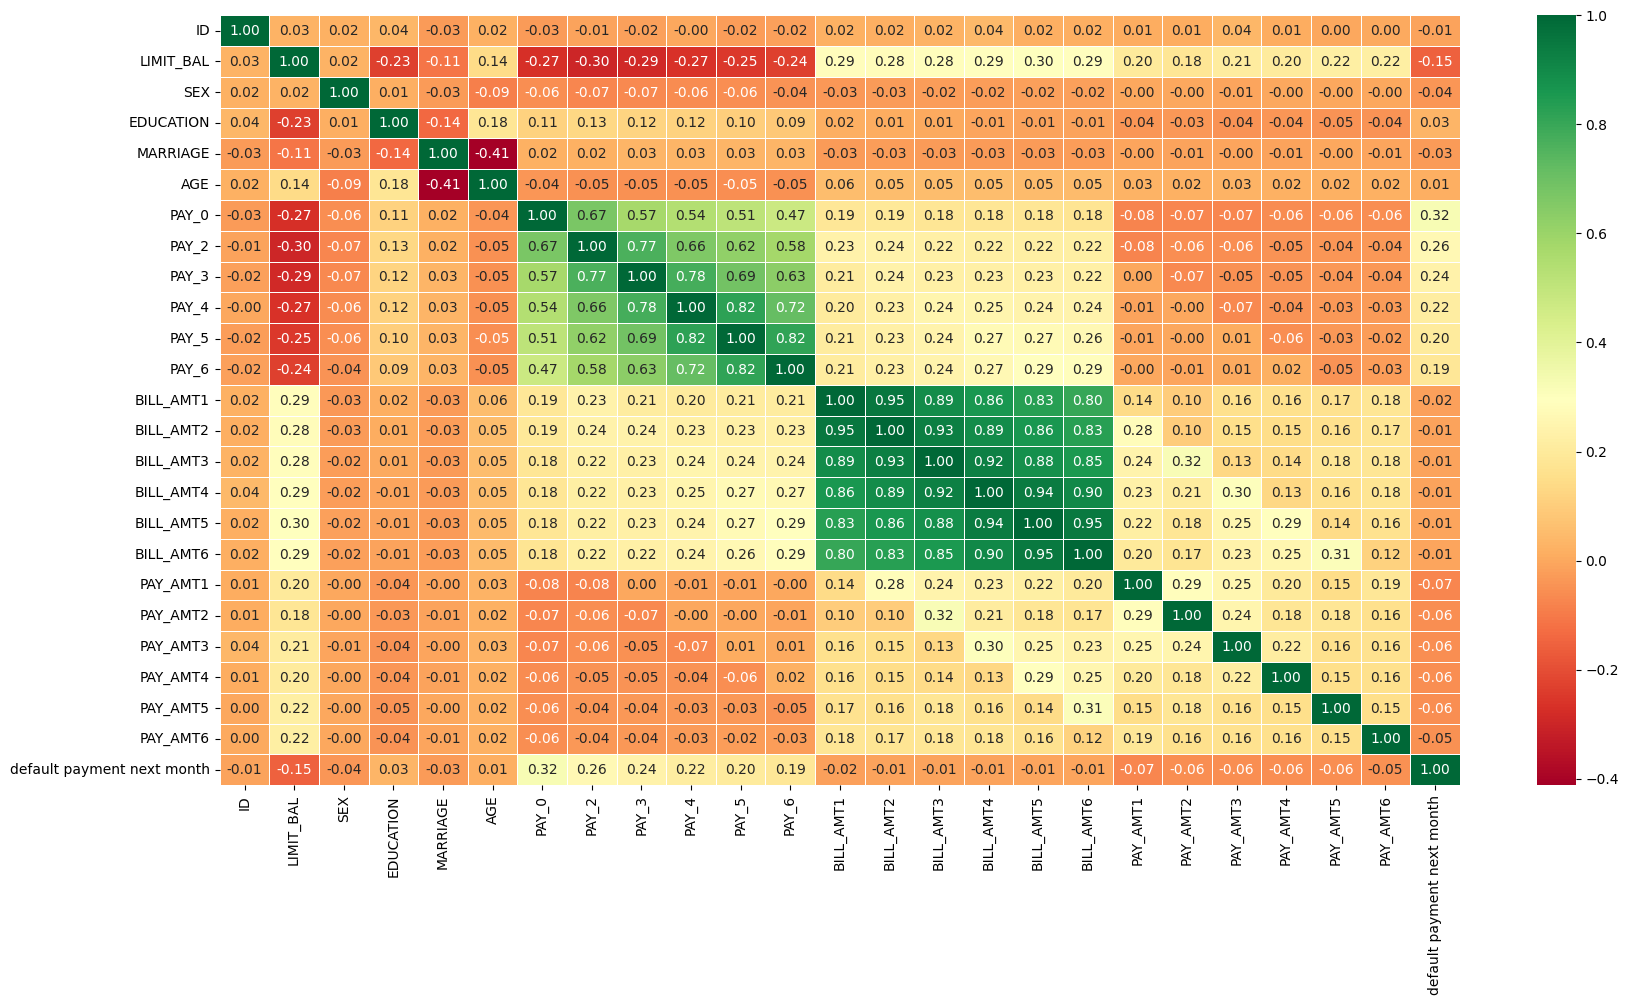

In [ ]:
# Correlation Heatmap visualization code
corrmat = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(dataset[corrmat.index].corr(),annot=True,linewidths=0.5,fmt='.2f',cmap="RdYlGn")

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. Since we want to find the relationship between different variables in dataframe and heatmap can be one of the ways to visualize it.

##### 2. What is/are the insight(s) found from the chart?

* PAY_0 to PAY_6 are highly correlated.
* BILL_AMT1 to BILL_AMT6 are highly correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant difference in the age with respect to default payment next month.

H1(alternate hypothesis): There is significant difference in the age with respect to default payment next month.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import mannwhitneyu

default=dataset[dataset['default payment next month']==1]
not_default=dataset[dataset['default payment next month']==0]
# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(default['AGE'],not_default['AGE'])
#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are accepting null hypothesis


<b>Thus we can conclude that there is no significant difference in the age with respect to default payment next month.

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

##### Why did you choose the specific statistical test?

As the age column is not normally distributed. So we cannot apply a parametric test so I applied a non-parametric Mann-Whitney U test to find the p-value as The Mann-Whitney U test is the nonparametric equivalent of the two sample t-test. While the t-test makes an assumption about the distribution of a population (i.e. that the sample came from a t-distributed population), the Mann Whitney U Test makes no such assumption.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant difference in the limit balance with respect to default payment next month.

H1(alternate hypothesis): There is significant difference in the limit balance with respect to default payment next month.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(default['LIMIT_BAL'],not_default['LIMIT_BAL'])
#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


<b>Thus we can conclude that there is significant difference in the limit balance with respect to default payment next month

<b>

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant dependency between the default payment next month and education.

H1(alternate hypothesis): There is significant dependency between the default payment next month and education.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['default payment next month'], dataset['EDUCATION'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


<b>Thus we can conclude that there is significant dependency between the default payment next month and education.

##### Which statistical test have you done to obtain P-Value?

Chi-square test.

##### Why did you choose the specific statistical test?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying. Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.And as I was dealing with categorical variable that why I used this test.

### Hypothetical Statement - 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant dependency between the default payment next month and marital status.

H1(alternate hypothesis): There is significant dependency between the default payment next month and marital status.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['default payment next month'], dataset['MARRIAGE'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


<b>Thus we can conclude that there is significant dependency between the default payment next month and marital status.

##### Which statistical test have you done to obtain P-Value?

Chi-square test.

### Hypothetical Statement - 5

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant dependency between the default payment next month and gender.

H1(alternate hypothesis): There is significant dependency between the default payment next month and gender.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(dataset['default payment next month'], dataset['SEX'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


<b> Thus we can conclude that there is significant dependency between the default payment next month and gender.

##### Which statistical test have you done to obtain P-Value?

Chi-square test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

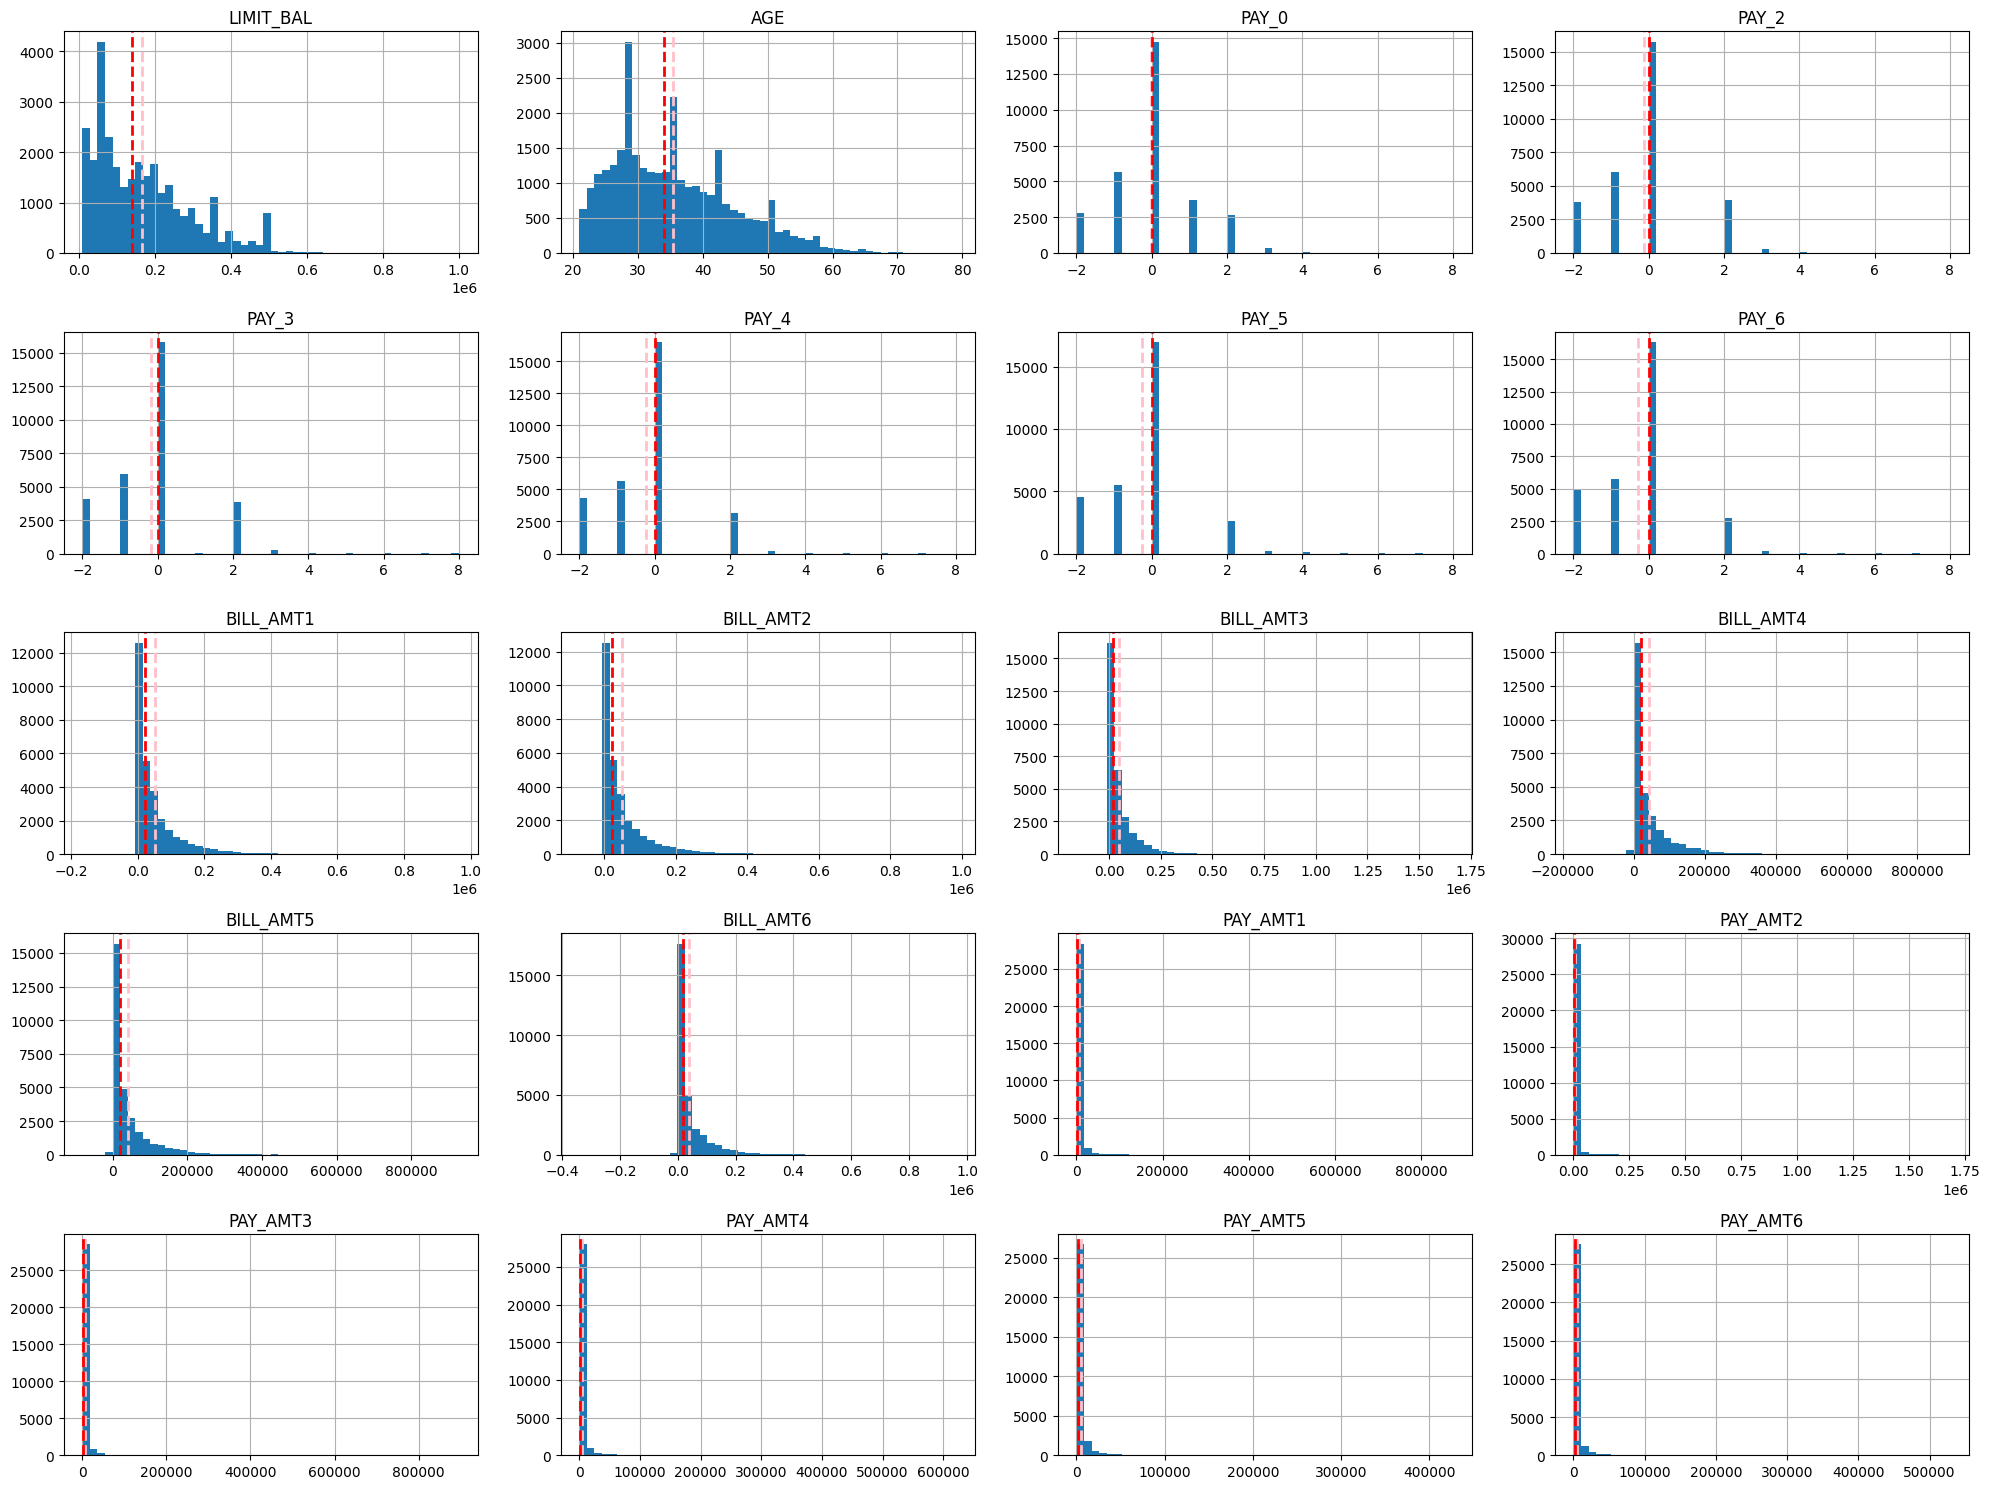

In [ ]:
#Checking for distribution of data using histogram
numeric_col = ['LIMIT_BAL', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
rows=5
cols=4
counter=1
fig = plt.figure(figsize=(20,15))
for col in numeric_col: 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  dataset[col].hist(bins=50, ax = ax) 
  ax.axvline(dataset[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(dataset[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [ ]:
# Transform Your data

#Applying power transformer using power transformer.
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
dataset[numeric_col]=pt.fit_transform(dataset[numeric_col])

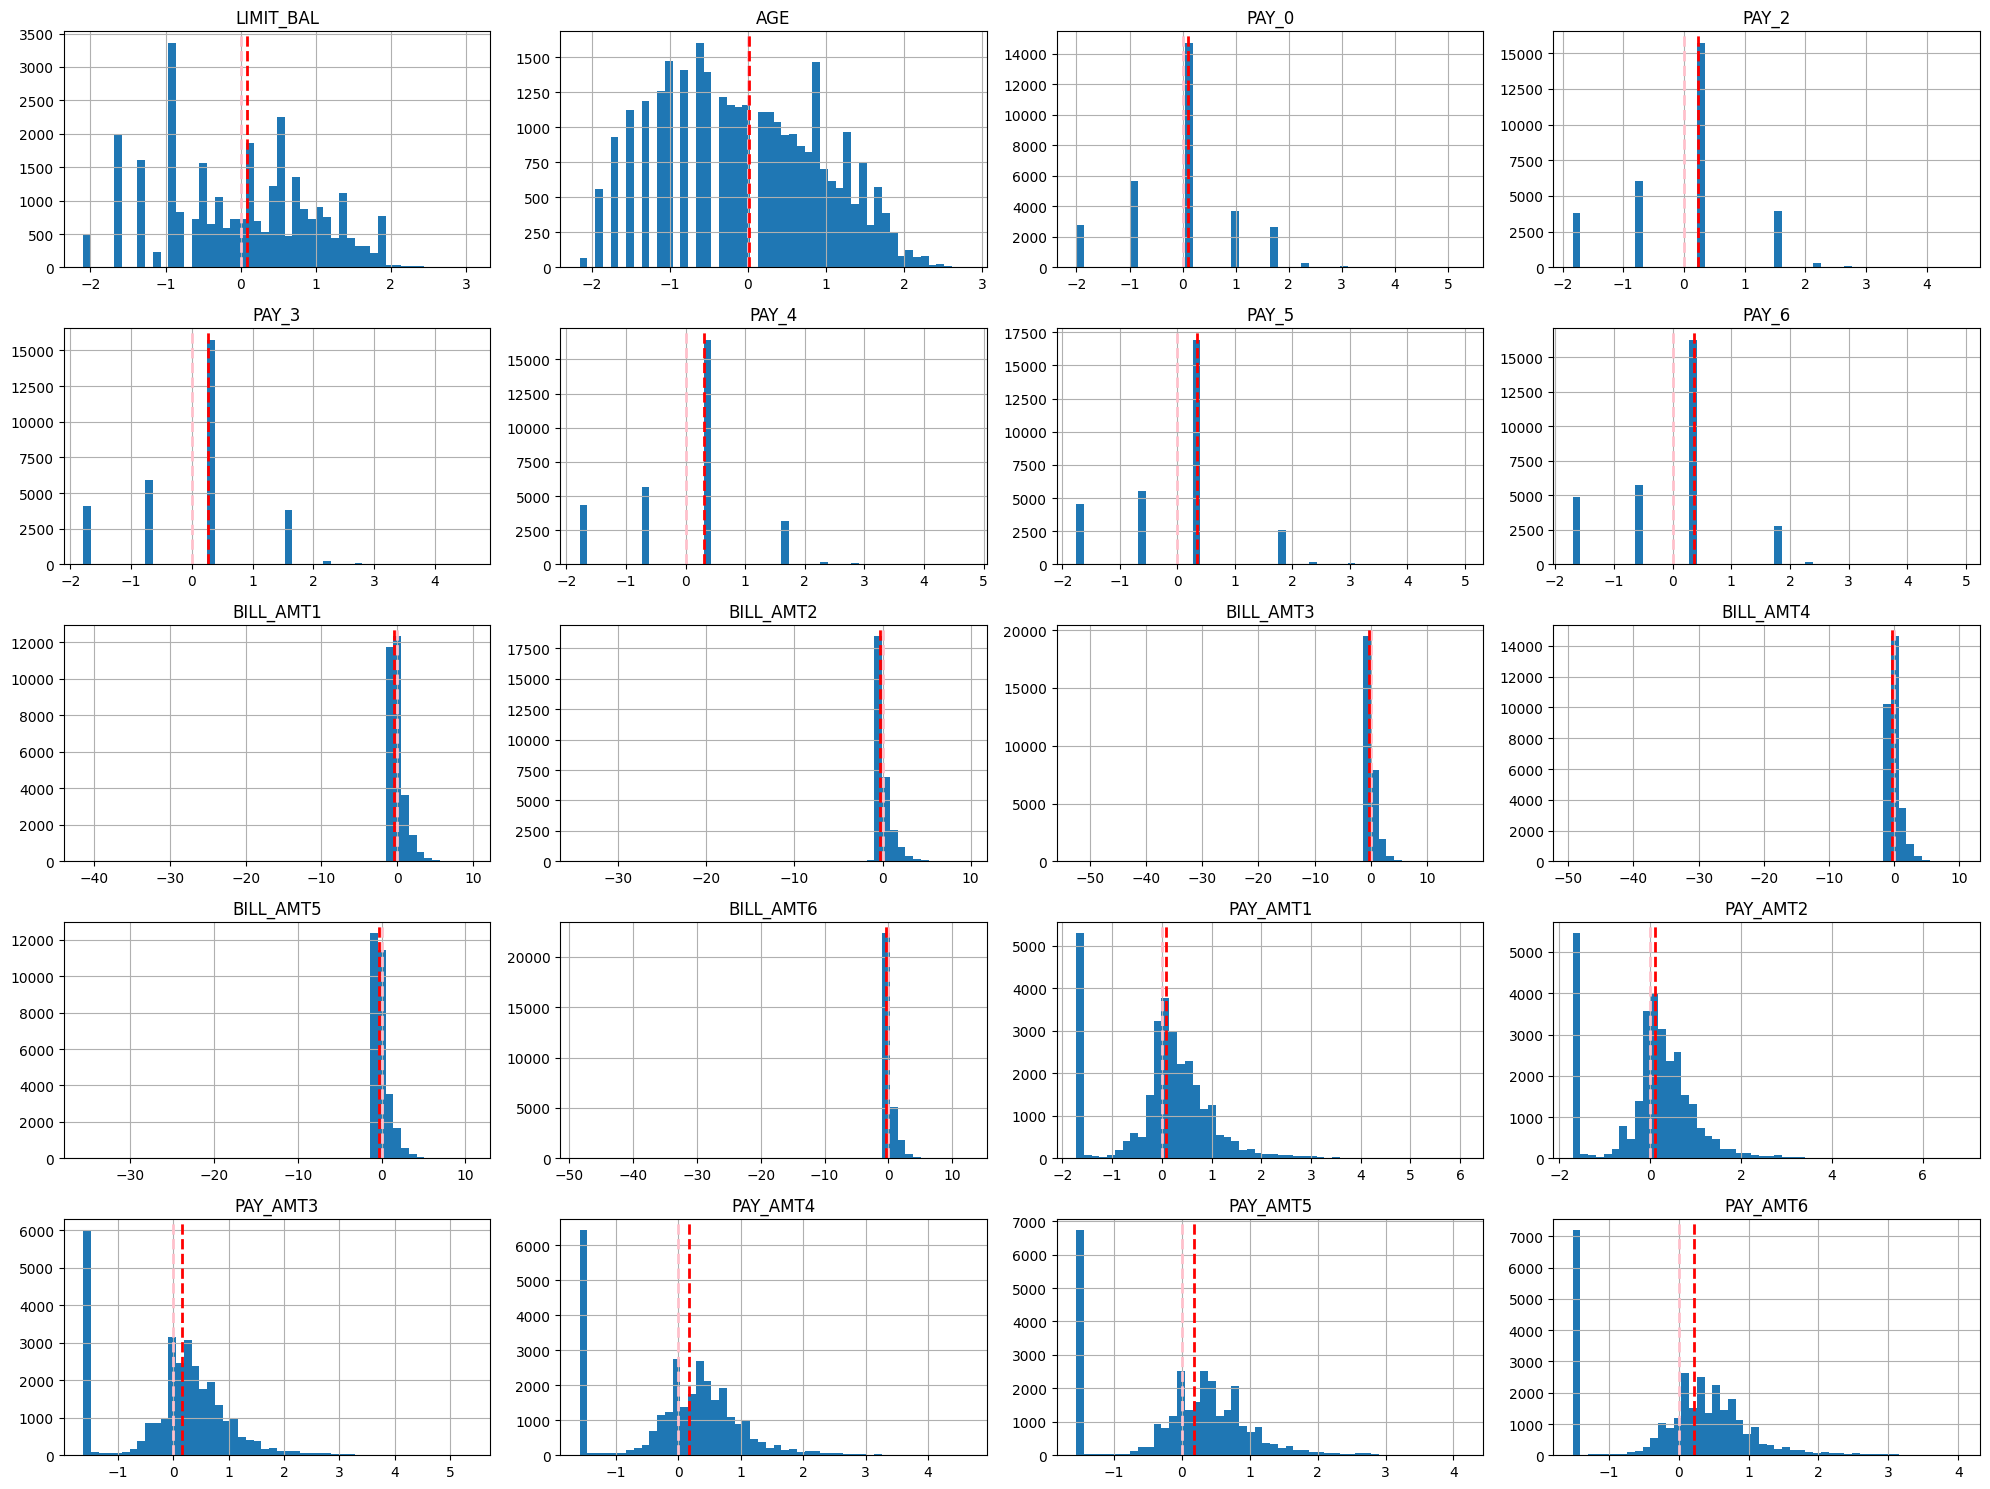

In [ ]:
#Again Checking for distribution of data using histogram
rows=5
cols=4
counter=1
fig = plt.figure(figsize=(20,15))
for col in numeric_col: 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  dataset[col].hist(bins=50, ax = ax) 
  ax.axvline(dataset[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(dataset[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# Dimensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### <b>8. Data Splitting

In [ ]:
X=dataset.drop(['default payment next month','Limit_cat','Age_cat','LimitBin','AgeBin','ID'],axis=1)#Dropping categorical variable created during feature engineering
y=dataset['default payment next month']


# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


###  Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Creating object 
train_scaler = StandardScaler()
test_scaler=StandardScaler()

#Fit on data
X_scaled=train_scaler.fit_transform(X)
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_scaled=test_scaler.fit_transform(X_test)


In [ ]:
#converting scaled data into dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)
X_scaled_train_df=pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
X_scaled_test_df=pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

In [ ]:
X_scaled_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.665383,0.810161,0.21187,-1.068797,-1.505599,1.662431,1.615503,-0.683908,-0.653252,-1.761424,...,-0.703133,-0.708335,-0.705134,-0.656065,-1.724472,-0.347889,-1.629996,-1.57807,-1.556978,-1.515825
1,-0.090364,0.810161,0.21187,0.849131,-1.134225,-0.889837,1.615503,0.259846,0.305873,0.340968,...,-0.655283,-0.624273,-0.604623,-0.580055,-1.724472,-0.202757,-0.080144,0.00908,-1.556978,0.332020


## ***7. ML Model Implementation***

#Implementing automl library for model selection

In [ ]:
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 50,  # in seconds
    "metric": 'roc_auc',
    "task": 'classification',
    "log_file_name": "credit_default.log",
}

# Train with labeled input data
automl.fit(X_train=X_scaled_train_df, y_train=y_train,
           **automl_settings)

[flaml.automl.logger: 04-18 03:15:39] {1682} INFO - task = classification
[flaml.automl.logger: 04-18 03:15:39] {1689} INFO - Data split method: stratified
[flaml.automl.logger: 04-18 03:15:39] {1692} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-18 03:15:39] {1790} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-18 03:15:39] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 04-18 03:15:39] {2210} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-18 03:15:39] {2336} INFO - Estimated sufficient time budget=973s. Estimated necessary time budget=24s.
[flaml.automl.logger: 04-18 03:15:39] {2383} INFO -  at 0.3s,	estimator lgbm's best error=0.2291,	best estimator lgbm's best error=0.2291
[flaml.automl.logger: 04-18 03:15:39] {2210} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-18 03:15:39] {2383} INFO -  at 0.4s,	estimator lgb

In [ ]:

models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier(criterion='entropy',
                                               max_features=0.394974887057685,                    #Parameters obtained using automl library
                                               max_leaf_nodes=16, n_estimators=4, n_jobs=-1,
                                               random_state=12032022),
        'Support Vector':SVC(),
        'XGB':XGBClassifier(),
        'Cat Boost':CatBoostClassifier(),
        'LGBM': lgb.LGBMClassifier(colsample_bytree=0.47342795260738935,                          #Parameters obtained using automl library
                                   learning_rate=0.024282186997032957, max_bin=1023,
                                   min_child_samples=9, n_estimators=160, num_leaves=19,
                                   reg_alpha=0.0009765625, reg_lambda=0.003241489691566038,
                                   verbose=-1)
        }


#Create function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
 
  # Dictionary to keep model scores
  models_trained={}
  model_scores={}
  clf_report={}


  #Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model=model.fit(X_train,y_train)
    models_trained[name]=model

    #Evaluate the model and append its accuracy score to model_scores
    model_scores[name]=model.score(X_test,y_test)

    #Predicting with tuned model
    y_preds=model.predict(X_test)

    #Creating classification report and storing it in dictionary
    clf_report[name]=classification_report(y_test,y_preds)
    
  #Saving all model accuracy scores in dataframe 
  model_compare=pd.DataFrame(model_scores,index=['accuracy'])

 
  return model_scores,model_compare,clf_report, models_trained


In [ ]:
#Model implementation using function
model_scores=fit_and_score(models=models,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

Learning rate set to 0.040021
0:	learn: 0.6710105	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6504822	total: 23.1ms	remaining: 11.5s
2:	learn: 0.6319253	total: 34.1ms	remaining: 11.3s
3:	learn: 0.6146552	total: 46ms	remaining: 11.4s
4:	learn: 0.5991423	total: 57.2ms	remaining: 11.4s
5:	learn: 0.5847864	total: 68.5ms	remaining: 11.3s
6:	learn: 0.5719739	total: 79.9ms	remaining: 11.3s
7:	learn: 0.5604869	total: 91.4ms	remaining: 11.3s
8:	learn: 0.5496199	total: 103ms	remaining: 11.4s
9:	learn: 0.5394853	total: 115ms	remaining: 11.4s
10:	learn: 0.5305494	total: 126ms	remaining: 11.3s
11:	learn: 0.5226583	total: 137ms	remaining: 11.3s
12:	learn: 0.5154303	total: 150ms	remaining: 11.4s
13:	learn: 0.5089677	total: 163ms	remaining: 11.5s
14:	learn: 0.5025815	total: 175ms	remaining: 11.5s
15:	learn: 0.4967436	total: 188ms	remaining: 11.5s
16:	learn: 0.4917000	total: 205ms	remaining: 11.8s
17:	learn: 0.4870278	total: 216ms	remaining: 11.8s
18:	learn: 0.4827964	total: 227ms	remaining: 11.7s
19:	l

In [ ]:
#Printing accuracy score of all the models
pd.DataFrame([model_scores[0]]).rename(index={0: 'Score'})

,Logistic Regression,KNN,Random Forest,Support Vector,XGB,Cat Boost,LGBM
Score,0.809167,0.784833,0.8275,0.822833,0.811,0.824167,0.828667


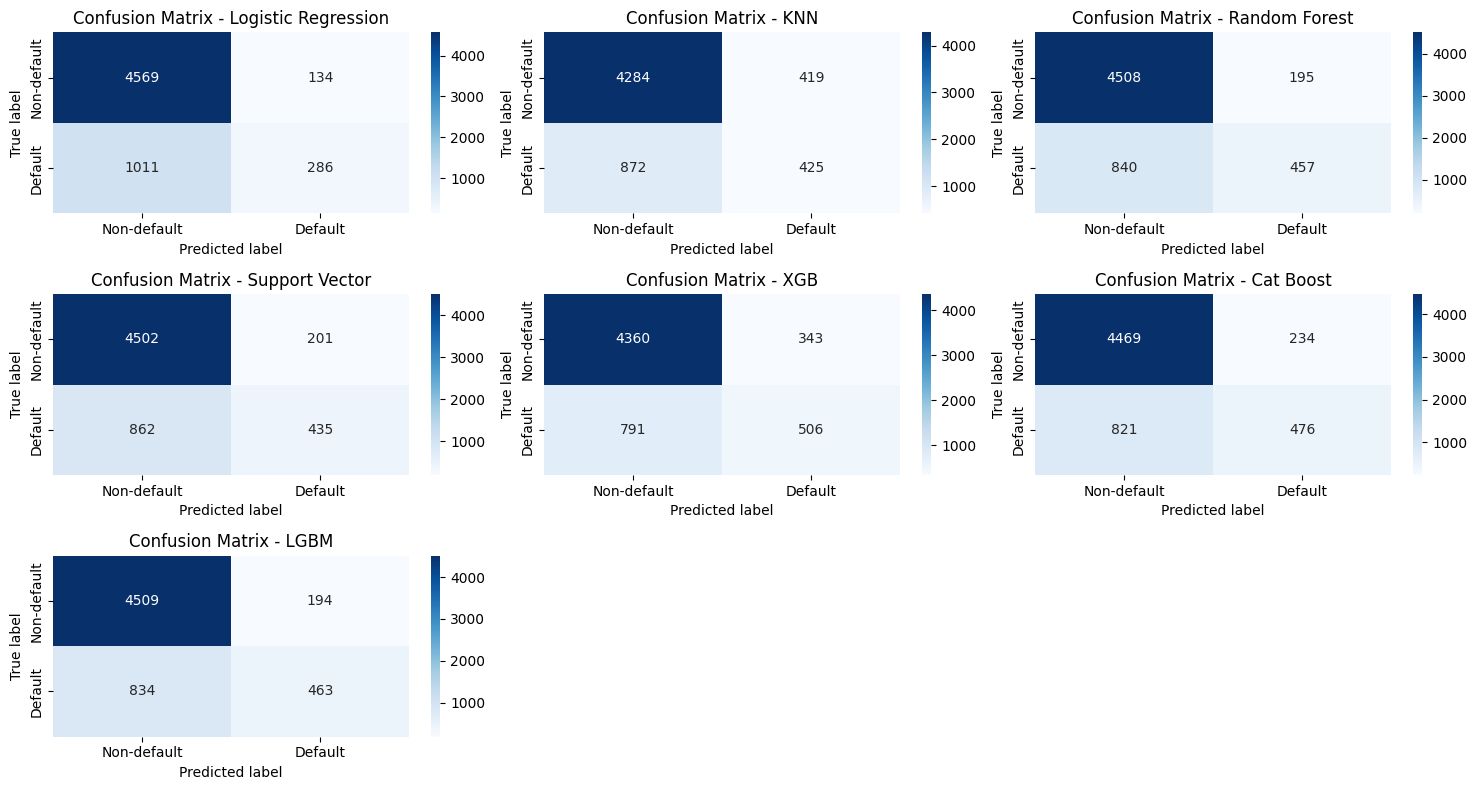

In [ ]:
#Confusion matrix for all the implemented models
rows=3
cols=3
counter=1
fig = plt.figure(figsize=(15,8))
for ind,key in enumerate(model_scores[3].keys()):
    y_score = model_scores[3][key].predict(X_scaled_test_df)
    ConfMatrix = confusion_matrix(y_test,y_score)
    plt.subplot(rows,cols,counter)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix - {key}")
    counter=counter+1
    plt.tight_layout() 

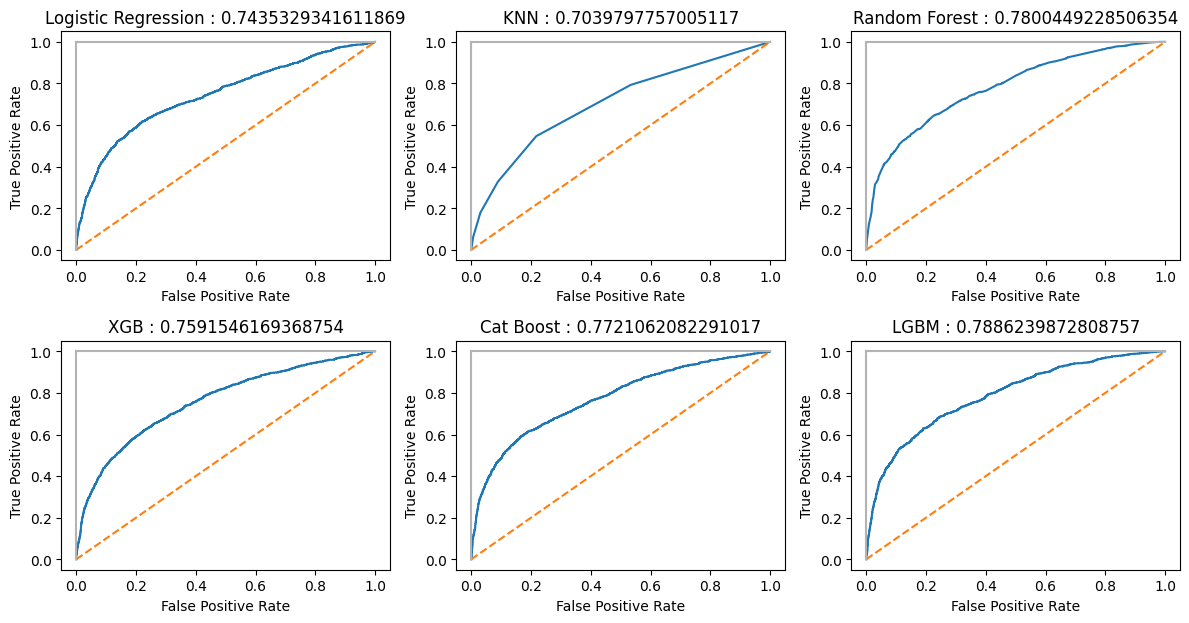

In [ ]:
#ROC-AUC curve for all the implemented model except SVM
rows=3
cols=3
counter=1

plt.figure(figsize=[12,9])
for ind,key in enumerate(model_scores[3].keys()):
  if(key!='Support Vector'):
    y_score = model_scores[3][key].predict_proba(X_scaled_test_df)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    plt.subplot(rows,cols,counter)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'{key} : {roc_auc_score(y_test,y_score)}')
    counter=counter+1
    plt.tight_layout() 

In [ ]:
#Printing classification report of all implemented models
for key in model_scores[2].keys():
  print(f'{key}:\n--------------------------------------------------------- \n---------------------------------------------------------\n{model_scores[2][key]}')


Logistic Regression:
--------------------------------------------------------- 
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4703
           1       0.68      0.22      0.33      1297

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000

KNN:
--------------------------------------------------------- 
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4703
           1       0.50      0.33      0.40      1297

    accuracy                           0.78      6000
   macro avg       0.67      0.62      0.63      6000
weighted avg       0.76      0.78      0.77      6000

Random Forest:
--------------------------------------------------------- 
------------

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

#Dictionary of all implemented models
model_dict=model_scores[3]
model_dict

{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier(criterion='entropy', max_features=0.394974887057685,
                        max_leaf_nodes=16, n_estimators=4, n_jobs=-1,
                        random_state=12032022),
 'Support Vector': SVC(),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs

In [ ]:
#Already implemented KNN
model_dict['KNN']

KNeighborsClassifier()

In [ ]:
#Dictionary of all implemented models classification score
clf_score_dict=model_scores[2]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#KNN classification score
print(clf_score_dict['KNN'])

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4703
           1       0.50      0.33      0.40      1297

    accuracy                           0.78      6000
   macro avg       0.67      0.62      0.63      6000
weighted avg       0.76      0.78      0.77      6000



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn import neighbors
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#List to stores train and test score
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,25)

#Setup knn instance
knn=model_dict['KNN']

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit the algorithm
  knn.fit(X_scaled_train_df,y_train)

  #Update the training score list
  train_scores.append(knn.score(X_scaled_train_df,y_train))

  #Update test score list
  test_scores.append(knn.score(X_scaled_test_df,y_test))

Maximum KNN score on the test data : 80.67%


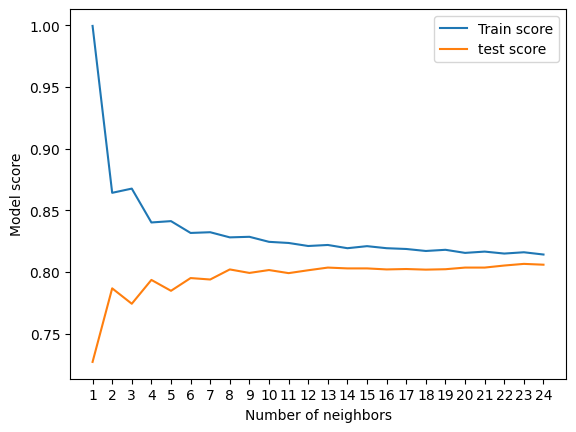

In [ ]:
#Line plot showing model score based on different value of neighbours.
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xticks(np.arange(1,25,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

##### Which hyperparameter optimization technique have you used and why?

Using different numbers of neighbours.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement in ROC_AUC score is observed.

In [ ]:
#Storing tuned model in dictionary
tuned_knn={'KNN':knn.set_params(n_neighbors=20)}

#Predicting with tuned model and plotting accuracy
tuned_knn_score=fit_and_score(models=tuned_knn,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [ ]:
#classification report of tuned knn model
print(tuned_knn_score[2]['KNN'])

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4703
           1       0.61      0.26      0.36      1297

    accuracy                           0.80      6000
   macro avg       0.72      0.61      0.62      6000
weighted avg       0.78      0.80      0.77      6000



In [ ]:
#Function to create confusion matrix
def conf_matrix(model,X_test,y_test):
  for ind,key in enumerate(model.keys()):
    y_score = model[key].predict(X_scaled_test_df)
    ConfMatrix = confusion_matrix(y_test,y_score)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix -{key}")


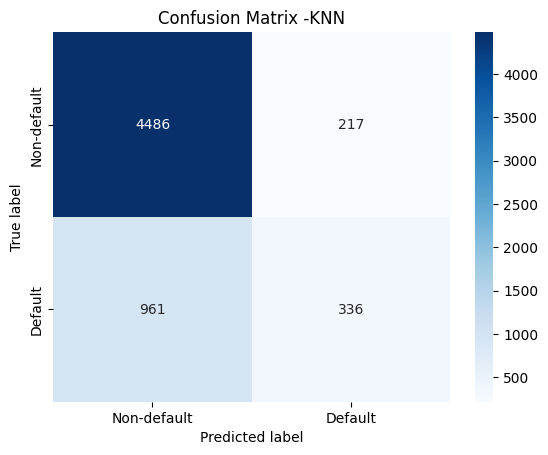

In [ ]:
#Confusion matrix for KNN
conf_matrix(model=tuned_knn,X_test=X_scaled_test_df,y_test=y_test)

In [ ]:
#function to plot ROC_AUC score 
def func_roc_curve(model,X_test,y_test):
  for ind,key in enumerate(model.keys()):
    y_score = model[key].predict_proba(X_scaled_test_df)[:,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
    print(f'{key}:  roc_auc_score - {roc_auc_score(y_test,y_score)}')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



KNN:  roc_auc_score - 0.7490577955867669


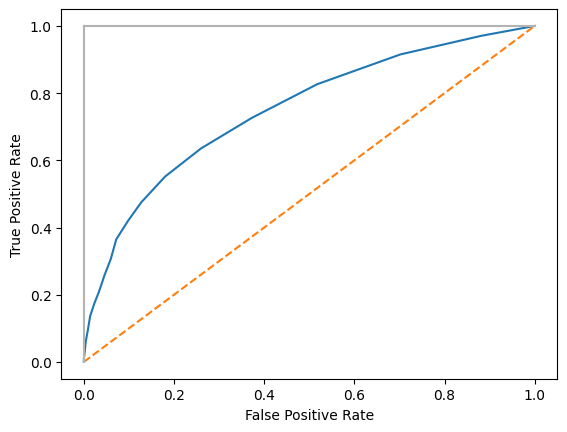

In [ ]:
#Plotting ROC_AUC curve for tuned KNN
func_roc_curve(model=tuned_knn,X_test=X_scaled_test_df,y_test=y_test)

* ROC_AUC score has improved a bit.

In [ ]:
#Function to calculate cross validation on tuned models
def cross_val(model,X,y):
  scores={}
  scoring_param=['accuracy','precision','recall','f1','roc_auc']
  for score in scoring_param:
    cv_score=cross_val_score(model,
                             X,
                             y,
                             cv=5,
                             scoring=score)
    scores[score]=np.mean(cv_score)
  return pd.DataFrame([scores]).rename(index={0:f'{model}'})

In [ ]:
#Performing cross validation
score_cv=cross_val(model=knn.set_params(n_neighbors=20),X=X_scaled_df,y=y)

In [ ]:
score_cv

,accuracy,precision,recall,f1,roc_auc
KNeighborsClassifier(n_neighbors=20),0.807067,0.654111,0.275168,0.386726,0.747542


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Implemented Logistic Regression
model_dict['Logistic Regression']


LogisticRegression()

In [ ]:
# Visualizing evaluation Metric Score chart
print(clf_score_dict['Logistic Regression'])

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4703
           1       0.68      0.22      0.33      1297

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Function to do hyperparameters tuning using grid search cv and randomized search cv

def Hyper_parameter_tuning(grid,model_name,parameter_grid,X_train,X_test,y_train,y_test):
  
  #creating regression model 
  clf_model=model_name

  if(grid==1):
    #Tuning parameters using grid search
    grid_search=GridSearchCV(clf_model,param_grid=parameter_grid,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
    #fitting model
    model_fit=grid_search.fit(X_train, y_train)

    #Predicting 
    y_pred = grid_search.predict(X_test)

    #Storing best parameters in dataframe
    scores={'best_parameter':grid_search.best_params_,f'{model_name} score': grid_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit

  else:
    #Tuning parameters using randomized search cv
    randomized_search=RandomizedSearchCV(clf_model,param_distributions=parameter_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

    #fitting model
    model_fit=randomized_search.fit(X,y)

    #Predicting 
    y_pred = randomized_search.predict(X_test)

    #Storing best parameters in dataframe
    scores={'best_parameter':randomized_search.best_params_,f'{model_name} score': randomized_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit
    
    return df,model_fit

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Logistic regression parameter grid
#5 min execution  time
"""
log_reg_grid={'C':np.logspace(-8,8,30),
              'solver':['newton-cg','lbfgs','liblinear'],
              'penalty':['l1','l2','elasticnet'],
              'max_iter':[50,75,100],
              
              }

#Implemention of hypermater tuning using functions
tuned_lr=Hyper_parameter_tuning(grid=1,model_name=model_dict['Logistic Regression'],
                                parameter_grid=log_reg_grid,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

#Best parameters
	                best_parameter	  LogisticRegression() score
       C	           0.000259	            0.805125
    max_iter          	50              	0.805125
    penalty	            l2              	0.805125
    solver	        liblinear	            0.805125


"""

"\nlog_reg_grid={'C':np.logspace(-8,8,30),\n              'solver':['newton-cg','lbfgs','liblinear'],\n              'penalty':['l1','l2','elasticnet'],\n              'max_iter':[50,75,100],\n              \n              }\n\n#Implemention of hypermater tuning using functions\ntuned_lr=Hyper_parameter_tuning(grid=1,model_name=model_dict['Logistic Regression'],\n                                parameter_grid=log_reg_grid,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)\n\n#Best parameters\n\t                best_parameter\t  LogisticRegression() score\n       C\t           0.000259\t            0.805125\n    max_iter          \t50              \t0.805125\n    penalty\t            l2              \t0.805125\n    solver\t        liblinear\t            0.805125\n\n\n"

In [ ]:
#Storing tuned model in dictionary
tuned_lr={'Tuned Logistic Regression':LogisticRegression(C=0.000259,max_iter=50,penalty='l2',solver='liblinear')}

#Predicting with tuned model and plotting accuracy
tuned_lr_score=fit_and_score(models=tuned_lr,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [ ]:
#Classification report of tuned model
print(tuned_lr_score[2]['Tuned Logistic Regression'])

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4703
           1       0.65      0.28      0.39      1297

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



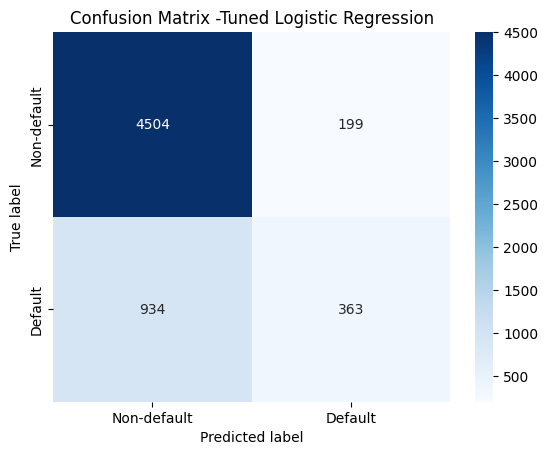

In [ ]:
#Confusion matrix for logistic regression
conf_matrix(model=tuned_lr_score[3],X_test=X_scaled_test_df,y_test=y_test)

Tuned Logistic Regression:  roc_auc_score - 0.742422732188693


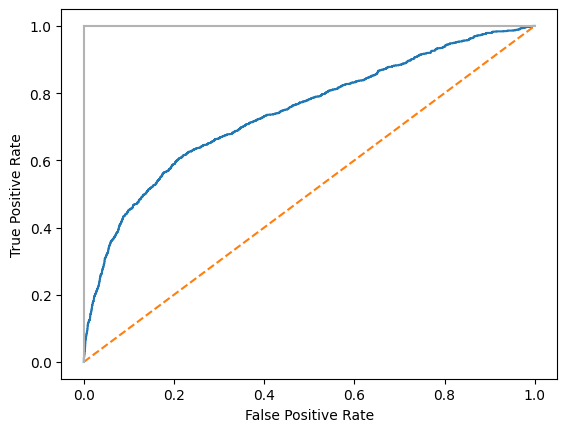

In [ ]:
#Plotting ROC_AUC curve for tuned logistic regression
func_roc_curve(model=tuned_lr_score[3],X_test=X_scaled_test_df,y_test=y_test)

* Remained same.

In [ ]:
#Cross validation and printing all scores
#15min execution time 
"""
model=tuned_lr[0][1]
cross_val_score=cross_val(model,X,y)

       accuracy	precision	  recall	 f1	       roc_auc
Score	0.805125	0.672926	0.214286	0.323868	0.743308

"""

'\nmodel=tuned_lr[0][1]\ncross_val_score=cross_val(model,X,y)\n\n       accuracy\tprecision\t  recall\t f1\t       roc_auc\nScore\t0.805125\t0.672926\t0.214286\t0.323868\t0.743308\n\n'

##### Which hyperparameter optimization technique have you used and why?

* Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

#Implemented Random Forest
model_dict['Random Forest']

RandomForestClassifier(criterion='entropy', max_features=0.394974887057685,
                       max_leaf_nodes=16, n_estimators=4, n_jobs=-1,
                       random_state=12032022)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

print(clf_score_dict['Random Forest'])

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.70      0.35      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
'''
#Takes 55 min to complete hyper parameter tuning 
rf_grid = { 
    'n_estimators': [200,250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
#Implementing geid search cv by passing grid=1
tuned_rf=Hyper_parameter_tuning(grid=1,model_name=model_dict['Random Forest'],parameter_grid=rf_grid,X_train=X_scaled_train_df,
                                X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)
  
 

best_parameter	RandomForestClassifier()   score
criterion	           entropy	            0.820367
max_depth	              8	                0.820367
max_features	         log2	              0.820367
n_estimators         	200	                0.820367
''' 

"\n#Takes 55 min to complete hyper parameter tuning \nrf_grid = { \n    'n_estimators': [200,250],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n#Implementing geid search cv by passing grid=1\ntuned_rf=Hyper_parameter_tuning(grid=1,model_name=model_dict['Random Forest'],parameter_grid=rf_grid,X_train=X_scaled_train_df,\n                                X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)\n  \n \n\nbest_parameter\tRandomForestClassifier()   score\ncriterion\t           entropy\t            0.820367\nmax_depth\t              8\t                0.820367\nmax_features\t         log2\t              0.820367\nn_estimators         \t200\t                0.820367\n"

In [ ]:
#storing tuned model in dictionary
model_rf={'Random Forest_tuned':RandomForestClassifier( n_estimators=200,max_features='log2',max_depth=8,criterion='entropy')}

#Implementing with best parameters and ploting accuracy score using function
model_tuned_rf=fit_and_score(models=model_rf,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [ ]:
print(model_tuned_rf[2]['Random Forest_tuned'])

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.70      0.35      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000



Random Forest_tuned:  roc_auc_score - 0.784834677122544


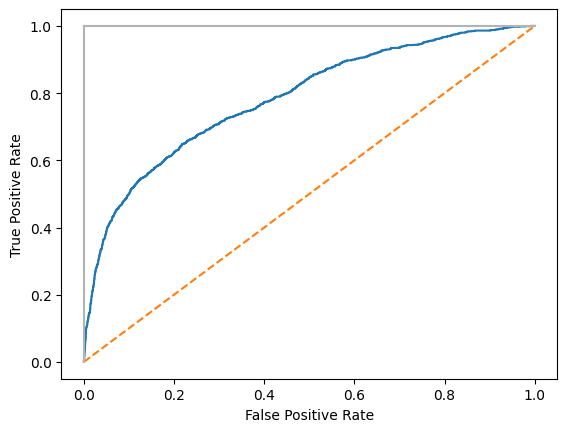

In [ ]:
#Plotting ROC_AUC curve for tuned random forest
func_roc_curve(model=model_tuned_rf[3],X_test=X_scaled_test_df,y_test=y_test)

* showing slight improvement in the score. 

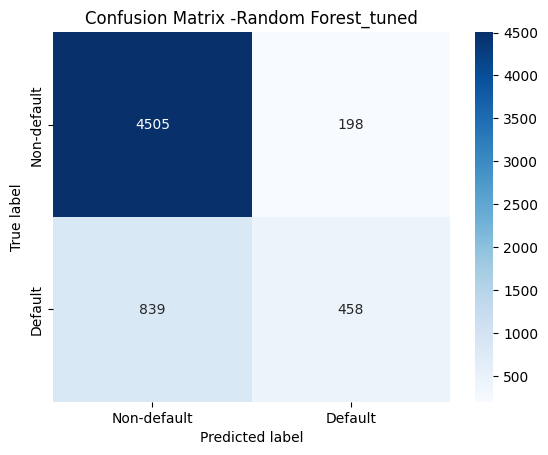

In [ ]:
#Confusion matrix of random forest.
conf_matrix(model=model_tuned_rf[3],X_test=X_scaled_test_df,y_test=y_test)

In [ ]:
#Cross Validation

#10 min executuion time
"""
model=classifier
cross_val_score_rf=cross_val(model,X,y)
cross_val_score_rf

     	accuracy	precision 	recall	   f1   	roc_auc
Score	0.817567	0.661143	0.366189	0.467487	0.772389

"""


'\nmodel=classifier\ncross_val_score_rf=cross_val(model,X,y)\ncross_val_score_rf\n\n     \taccuracy\tprecision \trecall\t   f1   \troc_auc\nScore\t0.817567\t0.661143\t0.366189\t0.467487\t0.772389\n\n'

##### Which hyperparameter optimization technique have you used and why?

* **GridSearchCV** is not helpful in the case of large datasets. It is difficult to keep running these codes for 
days in order to get the optimum results in the case of larger data sets with models like Random forest or XGBoost.

* So other efficient techniques of 
hyperparameter tuning are implemented in such cases and that is **RandomizedSearchCV**. 
* It is a highly 
efficient technique that is used to identify the optimum set of hyperparameter values in fewer  
iterations. 
* This technique performs quite well at a reduced cost and a shorter time for huge data sets and 
models with large numbers of hyperparameters.
*  It does not perform an exhaustive search of hyperparameters 
over ranges where it does not find any merit; instead, it hops over a wide space in far less time as compared 
with GridSearchCV. 
* It randomly moves within the grid to find the optimum set of hyperparameters. 
RandomizedSearchCV produces almost the same result as GridSearchCV in relatively lesser time.
* Considering all these factors  I will use GridSearchCV for tuning linear models and RandomizedSearchCV along with tuning by hand for non-linear models.

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation

#Implemented catboost model
model_dict['Cat Boost']

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report of catboost
print(clf_score_dict['Cat Boost'])

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.67      0.37      0.47      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyper parameter tuning using randomized search cv
cat_boost_param_grid = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
#Implementing randomized search cv
tuned_cat_boost=Hyper_parameter_tuning(grid=0,model_name=model_dict['Cat Boost'],parameter_grid=cat_boost_param_grid,X_train=X_scaled_train_df,
                                       X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6760875	total: 69.9ms	remaining: 6.92s
1:	learn: 0.6597317	total: 120ms	remaining: 5.88s
2:	learn: 0.6445714	total: 178ms	remaining: 5.74s
3:	learn: 0.6300781	total: 223ms	remaining: 5.35s
4:	learn: 0.6168425	total: 280ms	remaining: 5.33s
5:	learn: 0.6043255	total: 344ms	remaining: 5.39s
6:	learn: 0.5928447	total: 407ms	remaining: 5.4s
7:	learn: 0.5827661	total: 430ms	remaining: 4.94s
8:	learn: 0.5729258	total: 500ms	remaining: 5.05s
9:	learn: 0.5635427	total: 567ms	remaining: 5.1s
10:	learn: 0.5547195	total: 612ms	remaining: 4.95s
11:	learn: 0.5466075	total: 647ms	remaining: 4.75s
12:	learn: 0.5388267	total: 670ms	remaining: 4.48s
13:	learn: 0.5314603	total: 694ms	remaining: 4.26s
14:	learn: 0.5249861	total: 720ms	remaining: 4.08s
15:	learn: 0.5185962	total: 744ms	remaining: 3.91s
16:	learn: 0.5128521	total: 768ms	remaining: 3.75s
17:	learn: 0.5073402	total: 791ms	remaining: 3.6s
18:	learn: 0.5021600	total: 813ms	

In [ ]:
#Best parameters for catboost
tuned_cat_boost[0][0]

,best_parameter,<catboost.core.CatBoostClassifier object at 0x7efdf2ca12e0> score
depth,8.00,0.779644
iterations,100.00,0.779644
learning_rate,0.03,0.779644


In [ ]:
#Storing tuned model
model_cat_boost={'Tuned Cat boost':tuned_cat_boost[0][1]}

#Predicting using tuned model using function and plotting accuracy score
hand_tuned_cat_boost=fit_and_score(models=model_cat_boost,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6817486	total: 72ms	remaining: 7.13s
1:	learn: 0.6709986	total: 145ms	remaining: 7.12s
2:	learn: 0.6605855	total: 227ms	remaining: 7.35s
3:	learn: 0.6505271	total: 291ms	remaining: 6.99s
4:	learn: 0.6408746	total: 342ms	remaining: 6.5s
5:	learn: 0.6317331	total: 445ms	remaining: 6.98s
6:	learn: 0.6232485	total: 527ms	remaining: 7.01s
7:	learn: 0.6148272	total: 590ms	remaining: 6.79s
8:	learn: 0.6069615	total: 637ms	remaining: 6.44s
9:	learn: 0.5991748	total: 700ms	remaining: 6.29s
10:	learn: 0.5919294	total: 765ms	remaining: 6.19s
11:	learn: 0.5851661	total: 829ms	remaining: 6.08s
12:	learn: 0.5783710	total: 887ms	remaining: 5.93s
13:	learn: 0.5718978	total: 915ms	remaining: 5.62s
14:	learn: 0.5654446	total: 945ms	remaining: 5.35s
15:	learn: 0.5594339	total: 1.01s	remaining: 5.3s
16:	learn: 0.5539348	total: 1.06s	remaining: 5.17s
17:	learn: 0.5486139	total: 1.13s	remaining: 5.17s
18:	learn: 0.5440283	total: 1.17s	r

In [ ]:
#Classification report of tuned model
print(hand_tuned_cat_boost[2]['Tuned Cat boost'])

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4703
           1       0.70      0.37      0.48      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.82      0.83      0.81      6000



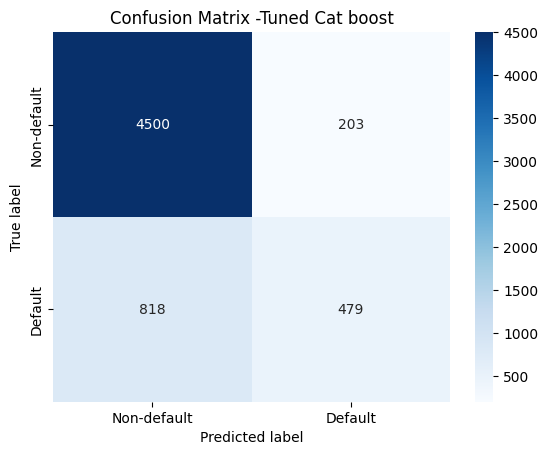

In [ ]:
#Confusion matrix of catboost.
conf_matrix(model=hand_tuned_cat_boost[3],X_test=X_scaled_test_df,y_test=y_test)

Tuned Cat boost:  roc_auc_score - 0.7819186755742943


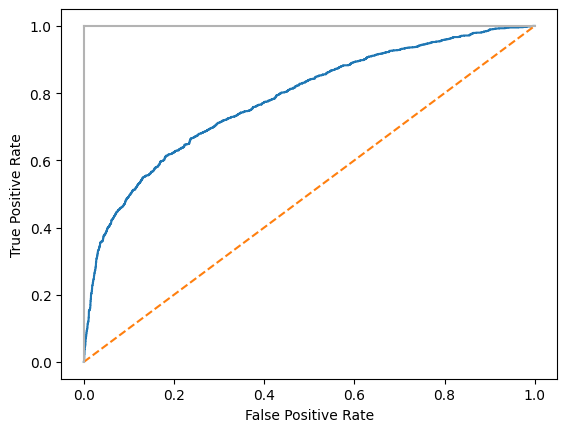

In [ ]:
#Plotting ROC_AUC curve for tuned catboost
func_roc_curve(model=hand_tuned_cat_boost[3],X_test=X_scaled_test_df,y_test=y_test)

* Slight improvement in the score can be observed.

In [ ]:
#Takes 20 min for cross validating model
#cv_cat=cross_val(model=hand_tuned_cat_boost[3]['Cat boost'],X=X_scaled_df,y=y)

"""
       accuracy	 precision	recall      	f1	roc_auc
Score	0.820067   	0.68664 	0.350667	0.46603	0.77517
"""

'\n       accuracy\t precision\trecall      \tf1\troc_auc\nScore\t0.820067   \t0.68664 \t0.350667\t0.46603\t0.77517\n'

# Model-5

In [ ]:
# ML Model - 5 Implementation

#Implemented XGB model
model_dict['XGB']

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Visualizing evaluation Metric Score chart

#Classification report of XGB
print(clf_score_dict['XGB'])

              precision    recall  f1-score   support

           0       0.85      0.93      0.88      4703
           1       0.60      0.39      0.47      1297

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyper Parameter tuning using randomized search cv
xgb_grid={
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
    
}
#Implementing randomized search cv
tuned_xgb=Hyper_parameter_tuning(grid=0,model_name=model_dict['XGB'],parameter_grid=xgb_grid,X_train=X_scaled_train_df,X_test=X_scaled_test_df,
                                      y_train=y_train,y_test=y_test)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
#Best parameters found
tuned_xgb[0][0]

,best_parameter,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=None, ...) score"
colsample_bytree,0.40,0.774829
gamma,0.00,0.774829
learning_rate,0.05,0.774829
max_depth,15.00,0.774829
min_child_weight,3.00,0.774829


In [ ]:
"""
#Takes 30 min for cross validating model
cv_xgb=cross_val(model=tuned_xgb[1],X=X_scaled_df,y=y)
cv_xgb

accuracy	precision	recall	    f1	     roc_auc
0.8207	  0.673974	0.361066	0.460015	0.781316
"""

'\n#Takes 30 min for cross validating model\ncv_xgb=cross_val(model=tuned_xgb[1],X=X_scaled_df,y=y)\ncv_xgb\n\naccuracy\tprecision\trecall\t    f1\t     roc_auc\n0.8207\t  0.673974\t0.361066\t0.460015\t0.781316\n'

In [ ]:
#Storing tuned model in dictionary
model_tuned_xgboost={'Tuned XGB':XGBClassifier(colsample_bytree=0.4,gamma=0,learning_rate=0.05,max_depth=15,min_child_weight=3)}

#Predicting using tuned model
xgb_tuned=fit_and_score(models=model_tuned_xgboost,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [ ]:
#classification report of tuned model
print(xgb_tuned[2]['Tuned XGB'])

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.69      0.36      0.47      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.83      0.80      6000



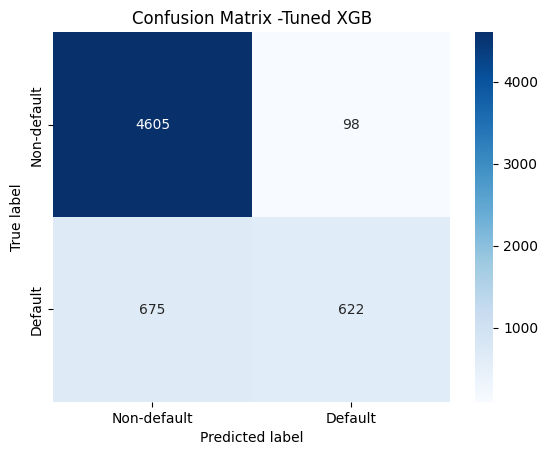

In [ ]:
#Confusion matrix of catboost.
conf_matrix(model={'Tuned XGB':tuned_xgb[1]},X_test=X_scaled_test_df,y_test=y_test)

Tuned XGB:  roc_auc_score - 0.9077419209936866


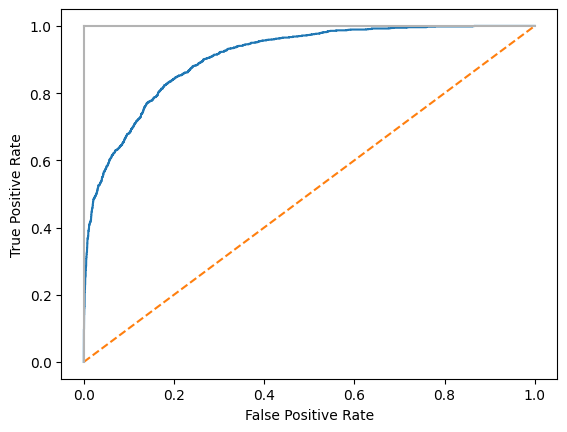

In [ ]:
#Plotting ROC_AUC curve for tuned XGboost
func_roc_curve(model={'Tuned XGB':tuned_xgb[1]},X_test=X_scaled_test_df,y_test=y_test)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have used confusion matrix and ROC-AUC curve for model evaluation.

**Confusion Matrix**
A confusion matrix is an n × n matrix, where n is the number of classes being predicted. The
following ﬁgure represents a confusion matrix for two classes.

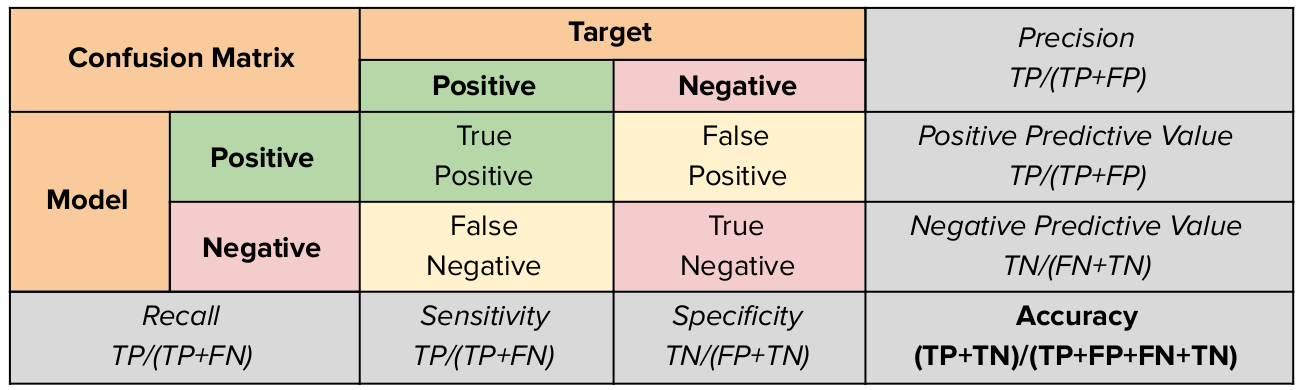

* Where accuracy of the model is the proportion of the total number of predictions that were correct.
* **Accuracy**
     * Accuracy = (T P + T N ) / (T P + F P + F N + T N )
* **Precision** : Proportion of positive cases correctly identiﬁed.
     * Positive Predictive Value or P recision = T P /(T P + F P )
* **Negative Predictive Value** : Proportion of negative cases correctly identiﬁed.
     * Negative Predictive V alue = T N /(T N + F N )
* **Sensitivity / Recall** : Proportion of actual positive cases correctly identiﬁed.
     * Sensitivity or Recall = T P /(T P + F N )
* **Speciﬁcity** : Proportion of actual negative cases correctly identiﬁed.
     * Specificity = T N /(T N + F P )
* **True Positive Rate** : Proportion of actual positive cases correctly identiﬁed.
     * True Positive Rate = T P /(T P + F N )
*  **False Positive Rate** : Proportion of actual negative cases incorrectly identiﬁed.
     * Specif icity = F P /(F P + T N )
* **F1 Score** : It is the harmonic mean of Precision and Recall.
     * F1 Score = 2 × (P recision × Recall)/(P recision + Recall)

**ROC Curve:-**

* The ROC or Receiver Operating Characteristics curve is the plot between True Positive Rate and the
False Positive Rate, or simply, a tradeoﬀ between sensitivity and speciﬁcity.  

* The biggest advantage
of using the ROC curve is that it is independent of the change in proportion of responders. This is
because it has both the axes derived out from the columnar calculations of confusion matrix, where
the numerator and denominator of both x and y axis change on a similar scale for any change in
the response rate. 

The following ﬁgure shows the more the ROC curve is towards the upper-left
corner (i.e the more is the area under the curve), the better is the model.

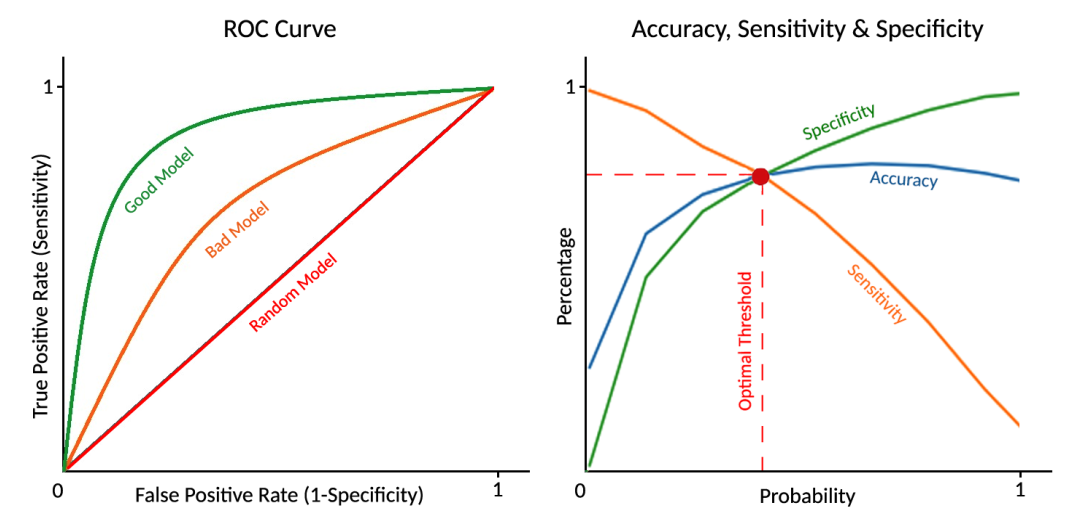

* As can be seen, from the accuracy, sensitivity and speciﬁcity tradeoﬀ, that when the probability
thresholds are very low, the sensitivity is very high and the speciﬁcity is very low. 
* Similarly, for larger
probability thresholds, the sensitivity values are very low but the speciﬁcity values are very high.
* One could choose any cut-oﬀ point based on which of these metrics is required to be high.
* It is completely dependent on the situation. But the
optimal cut-oﬀ point (where accuracy, sensitivity and speciﬁcity meet) can give a fair idea of how the
thresholds should be chosen.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As from the above comparison, our model with the XGBoosting algorithm is providing quite consistent results in training, testing, and cv score.So I will choose the XGBoosting  model  for the final prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Weights for XGB
eli.explain_weights(xgb_tuned[3]['Tuned XGB'])

Weight,Feature
0.2640,PAY_0
0.1688,PAY_2
0.1450,PAY_5
0.1149,PAY_4
0.0774,PAY_3
0.0353,PAY_6
0.0194,LIMIT_BAL
0.0173,PAY_AMT1
0.0170,PAY_AMT2
0.0144,BILL_AMT1


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'credit_card_default.sav'
pickle.dump(tuned_xgb[1], open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model_score= loaded_model.score(X_test, y_test)
print(loaded_model_score)

0.9827062107537783


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**ML Model selected for deployment: XGBClassifier**
> XGBoost is a powerful and widely-used tool for classification tasks, and it has been applied successfully to a variety of real-world problems such as predictive modeling, time series forecasting, and customer churn prediction etc.

**Advantages**
* XGB consists of a number of hyper-parameters that can be tuned — a primary advantage over gradient boosting machines.
* XGBoost has an in-built capability to handle missing values.
* It provides various intuitive features, such as parallelisation, distributed computing, cache optimisation etc

**Disadvantages:**

* Like any other boosting method, XGB is sensitive to outliers.
* Unlike LightGBM, in XGB, one has to manually create dummy variable/ label encoding for categorical features before feeding them into the models. 


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***